# Arab Countries Ecological Footprint Analysis according to NFA  
The National Footprint Accounts (NFAs) measure the ecological resource use and resource capacity of nations over time using . 

The dataset uses  [the global hectare](https://recyclenation.com/green-glossary/global-hectare-gha/) unit to measure the ecological footprint. The global hectare is based on the area-weighted average productivity of usable land and water in a given year. Because different land types have different productivity, a global hectare of, for example, cropland, would occupy a smaller physical area than the much less biologically productive pasture land, as more pasture would be needed to provide the same biocapacity as one hectare of cropland. Because world bioproductivity varies slightly from year to year, the value of a GHA may change slightly from year to year. 
we will use this dataset to analyse the ecological footprint of Arab countries or Arab world. 

![Arab World](https://upload.wikimedia.org/wikipedia/commons/e/e4/The_Arab_Countries.png)[The Arab world](https://en.wikipedia.org/wiki/Arab_world#cite_note-Frishkopf-6) (Arabic: العالم العربيalso known as the Arab nation or the Arab states or countries currently consists of the 22 Arab countries of the Arab League. The Arab League includes Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman,  Palestine , Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, the United Arab Emirates, and Yemen. By adding Iran and Turkey they will represent the Middle East and North Africa region or MENA region.    
![](https://thumbs.dreamstime.com/b/carte-et-environs-de-ligue-arabe-28727740.jpg)

Unfortunately, The dataset dose not include any information about Palestine, hope to include it in the next versions as it is very important Arabic Country. So, the analysis will be for the remaining 21 countries.

****Dataset columns descrbtion****

***Country:*** Country name

***ISO:*** alpha-3 code of the country.

***UN_region: *** Region of the country.

***UN_subregion:*** Subregion of the country.

***year:*** Year in which values are calculated.

***record:*** Description of reported global hectares.

***crop_land:*** Global hectares of crop land (used for crops & crop-derived products) available or demanded. Biocapacity = Footprint of production because all biocapacity is used for production.

***grazing_land:*** Global hectares of grazing land (used for meat, dairy, leather, etc.) available or demanded.
Includes global hectares used for grazing, but not crop land used to produce feed for animals.
forest_landGlobal hectares of forest land available (for sequestration and timber, pulp, or timber products) or demanded (for timber, pulp, or timber products).

***fishing_ground:*** Global hectares of marine and inland fishing grounds (used for fish & fish products) available or demanded.

***built_up_land:*** Global hectares of built-up land (land cover of human infrastructure) available or demanded. Not traded. Biocapacity equals Footprint of Production because 100% of biocapacity covered counts as that demanded by infrastructure coverage.

***carbon:*** Global hectares of world-average forest required to sequester carbon emissions.

***total:*** The sum of all land types for this country, year, and record.

***Percapita GDP (2010 USD):*** Per capita GDP in constant 2010 USD (source: World Bank).

***population:*** population rounded to thousands (FAO estimate).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

%matplotlib inline
sns.set(font_scale=1.1)
# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv("input/NFA 2018.csv")

In [41]:
data.sample(10)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
16470,Costa Rica,CRI,Latin America and the Caribbean,Central America,1962,BiocapPerCap,3.904165e-01,7.734541e-01,4.158536e+00,0.421075,3.349049e-02,0.000000e+00,5.776972e+00,2847.150,1433000
43366,Lebanon,LBN,Asia,Western Asia,2008,EFImportsPerCap,5.690140e-01,3.398316e-01,3.056868e-01,0.038619,0.000000e+00,9.811803e-01,2.234331e+00,7859.940,4109000
291,Afghanistan,AFG,Asia,Southern Asia,1967,BiocapTotGHA,5.028797e+06,6.122108e+06,6.559720e+05,0.000000,2.995125e+05,0.000000e+00,1.210639e+07,NaN,10369000
14006,Chad,TCD,Africa,Middle Africa,1986,EFImportsPerCap,1.065776e-02,2.370380e-04,9.812630e-04,0.000318,0.000000e+00,1.611167e-02,2.830537e-02,518.621,5244000
17030,Cuba,CUB,Latin America and the Caribbean,Caribbean,1964,BiocapPerCap,2.340330e-01,1.360807e-01,2.161794e-01,0.234714,2.858289e-02,0.000000e+00,8.495901e-01,NaN,7787000
65380,Saint Lucia,LCA,Latin America and the Caribbean,Caribbean,1987,BiocapPerCap,3.843760e-01,7.024297e-03,1.424152e-01,0.198369,3.377937e-03,0.000000e+00,7.355627e-01,5092.030,131000
46424,Malaysia,MYS,Asia,South-Eastern Asia,1995,EFExportsPerCap,5.128780e-01,1.092814e-02,5.944942e-01,0.051795,0.000000e+00,1.006482e+00,2.176577e+00,6275.120,20725000
19226,Denmark,DNK,Europe,Northern Europe,1970,EFImportsPerCap,4.805899e-01,8.547346e-02,6.074899e-01,0.341083,0.000000e+00,2.090071e+00,3.604707e+00,30541.900,4930000
4249,Austria,AUT,Europe,Western Europe,2003,EFProdTotGHA,5.374656e+06,1.373328e+06,1.119295e+07,574.272368,1.104255e+06,2.665725e+07,4.570302e+07,43135.400,8155000
60672,Portugal,PRT,Europe,Southern Europe,1981,EFConsPerCap,7.411974e-01,1.717990e-01,3.146650e-01,0.273413,1.579900e-02,1.356769e+00,2.873643e+00,12478.700,9824000


In [4]:
data.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
count,87020.000000,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,8.702000e+04,71410.000000,8.702000e+04
mean,1989.193059,1.465068e+07,6.324612e+06,1.531334e+07,3.576364e+06,1.311909e+06,2.591459e+07,5.217695e+07,10129.722779,6.305956e+07
std,15.490923,1.445766e+08,6.237420e+07,1.798437e+08,3.905889e+07,1.448057e+07,3.448775e+08,5.890184e+08,15646.206882,4.264394e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.150000e-05,115.794000,5.000000e+03
25%,1976.000000,3.027605e-01,7.470049e-02,1.508091e-01,3.252735e-02,0.000000e+00,1.946352e-02,1.313131e+00,988.470000,2.001000e+06
50%,1990.000000,2.841671e+00,2.526463e+00,3.110603e+00,3.670478e+00,3.247780e-02,1.293047e+00,1.858845e+02,3153.740000,6.632500e+06
75%,2003.000000,2.027347e+06,6.580112e+05,1.497303e+06,2.436509e+05,5.794159e+04,9.168465e+05,7.792829e+06,11972.100000,2.056300e+07
max,2014.000000,3.996304e+09,1.576582e+09,5.496461e+09,1.127790e+09,4.649979e+08,1.251963e+10,2.060191e+10,113682.000000,7.265786e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 15 columns):
country                     87020 non-null object
ISO alpha-3 code            85660 non-null object
UN_region                   87020 non-null object
UN_subregion                87020 non-null object
year                        87020 non-null int64
record                      87020 non-null object
crop_land                   63530 non-null float64
grazing_land                63530 non-null float64
forest_land                 63530 non-null float64
fishing_ground              63530 non-null float64
built_up_land               63530 non-null float64
carbon                      63530 non-null float64
total                       87020 non-null float64
Percapita GDP (2010 USD)    71410 non-null float64
population                  87020 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 10.0+ MB


In [6]:
def extract_country_by_record(df,country_name,record):
    country_foot_print=df[df.country.isin([country_name])]
    country_by_record = country_foot_print [country_foot_print.record.isin([record])]
    return country_by_record

def extract_countries_feature_by_year (df,countries_list,feature,year,record="BiocapPerCap"):
    excluded_countries=[]
    feature_values=[]
    available_countries=[]
    for i in range (0,len(countries_list)):
        country_by_record = extract_country_by_record(df,countries_list[i],record)
        feature_value = country_by_record.loc[lambda df1: country_by_record.year == year][feature].values
        if  feature_value.size==0 or math.isnan(feature_value[0]) :
            excluded_countries.append(countries_list[i])
        else:
            feature_values.append(feature_value[0]) 
            available_countries.append(countries_list[i])
            
#  activate if you need to print the excluded countries in the year
#     if len(excluded_countries) != 0:
#         print("excluded countries in {0} are : ".format(year))
#         for i in excluded_countries:
#             print(i)
    return feature_values, available_countries, excluded_countries 
def print_excluded_countries (excluded_countries,year):
    if len(excluded_countries) != 0:
        print("excluded countries from dataset in {0} are : ".format(year))
        for i in excluded_countries:
            print(i)   
            
def calculate_growth_rate(present,past,period):
    #present : present year , past: past year , period: number of years between present and past
    percentage_growth_rate = ((present - past)/(past*period))*100
    return percentage_growth_rate
    

In [7]:
arab_countries = ['Egypt','Algeria','Bahrain','Libyan Arab Jamahiriya',
                 'Jordan','Iraq','Mauritania','Morocco',
                  'Saudi Arabia','Kuwait','Qatar','Sudan (former)',
                 'Oman','Tunisia','United Arab Emirates','Yemen',
                  'Lebanon','Syrian Arab Republic','Somalia','Comoros','Djibouti']

colors = ['blue','xkcd:medium grey','red','green','pink',
          'xkcd:muted blue','yellow','magenta','brown',
          'orange','xkcd:tan','xkcd:seafoam','tab:olive',
          'xkcd:turquoise','xkcd:mauve','xkcd:acid green',
          'xkcd:bland','xkcd:coral','xkcd:chocolate','xkcd:red purple',
          'xkcd:bright lilac','xkcd:heather']

years=np.sort(data.year.unique())

arab_df = pd.DataFrame()
for country in arab_countries:
    arab_df=arab_df.append(data[data.country.isin([country])])


**Arab countries distrbution according to regions**

Text(0.5,1,'Arab countries distrbution according to subregions')

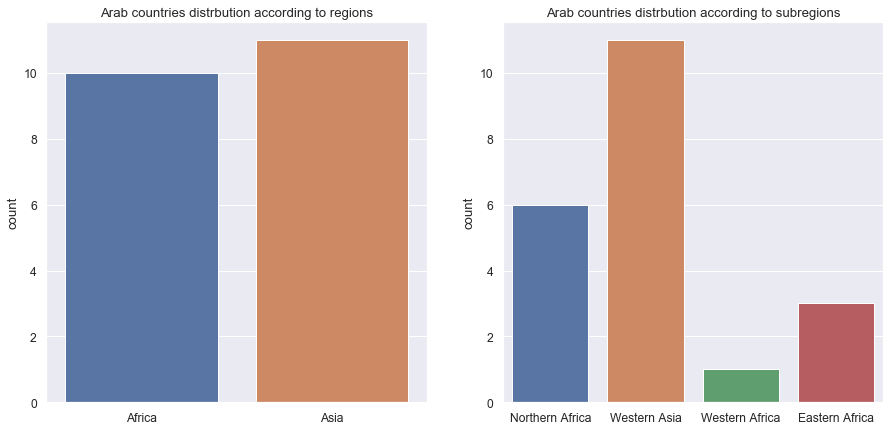

In [8]:
fig= plt.figure(figsize=(15,7))
regoin=[]
sub_region=[]
for country in arab_countries:
    regoin.append(arab_df[arab_df.country.isin([country])]["UN_region"].unique()[0])
    sub_region.append(arab_df[arab_df.country.isin([country])]["UN_subregion"].unique()[0])
plt.subplot2grid((1,2),(0,0))
sns.countplot(pd.Series(regoin))
plt.title("Arab countries distrbution according to regions")
plt.subplot2grid((1,2),(0,1))
sns.countplot(pd.Series(sub_region))
plt.title("Arab countries distrbution according to subregions")



# Population analysis
The dataset dose not have population data of Sudan because after the end of the civil war Sudan splits into two countries Sudan in the north and South Sudan in the south that why sudan found under name Sudan (former) . Even that Sudan is considered one of the most populated arab countries with population reached approximately to 40 million. 
 As we compare between the countries according to the available data which ended in 2014. We appended the population of Sudan to the list to have more clear comparison. The source of population data of sudan in 2014 is [here](https://www.google.com.eg/publicdata/explore?ds=d5bncppjof8f9_&ctype=l&strail=false&bcs=d&nselm=h&met_y=sp_pop_totl&scale_y=lin&ind_y=false&rdim=country&idim=country:SDN&ifdim=country&hl=en&dl=en&ind=false&icfg) .

![](http://newsimg.bbc.co.uk/media/images/42426000/gif/_42426259_sou_sud_jub_map203.gif)

**Population distrbution across Arab countries**

excluded countries from dataset in 2014 are : 
Sudan (former)


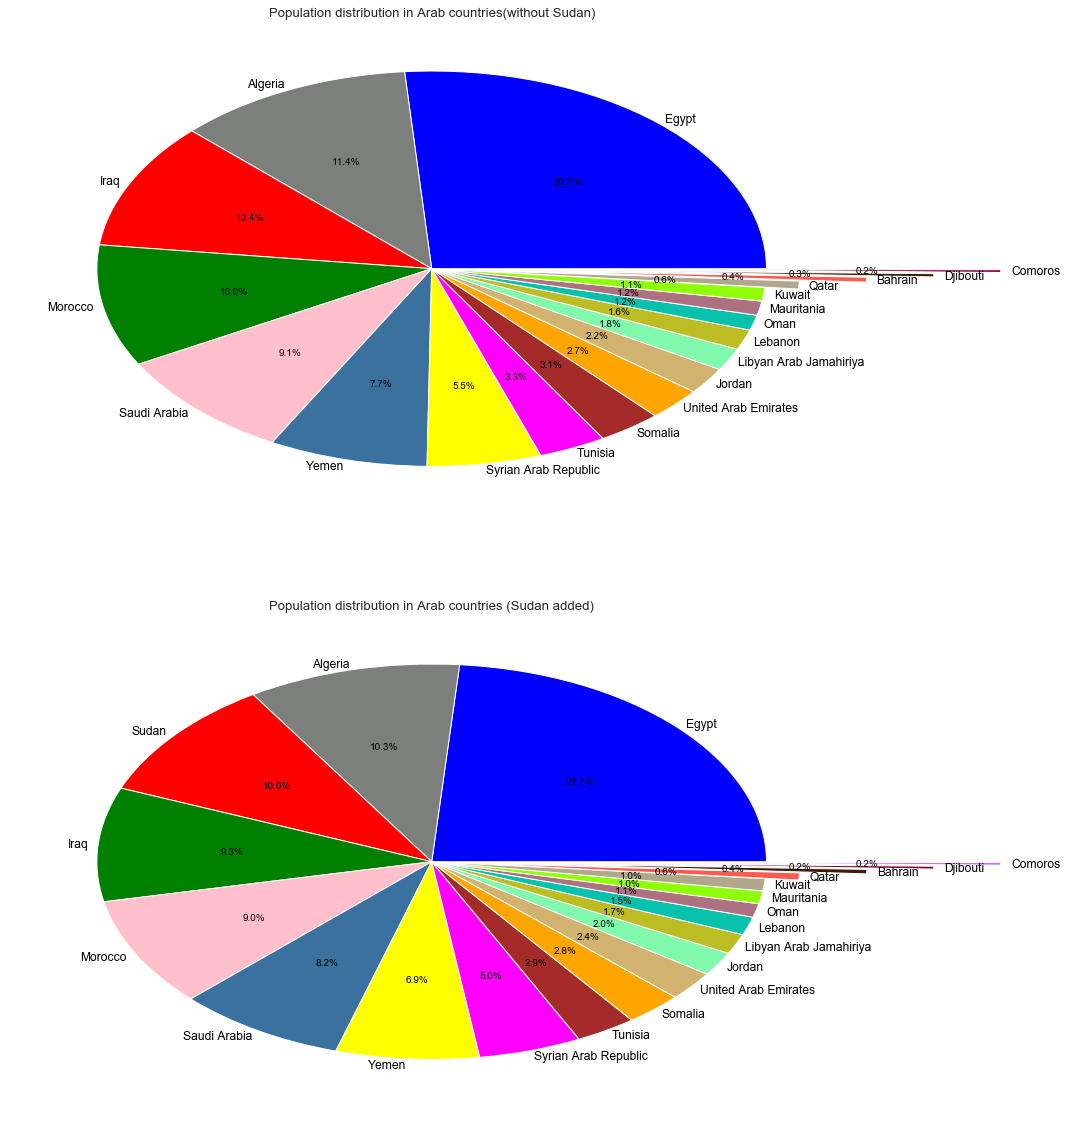

In [9]:
fig = plt.figure(figsize=(15,20))
plt.subplot2grid((2,1),(0,0))
population,available_countries,excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'population',2014)
population_df = pd.DataFrame({'countery':available_countries,'population':population}).sort_values(by='population',ascending=False)
population_list = list (population_df['population'])
# to avoid overlab of labels at the small slices in the chart the explode added 
# the explode len must be the same len of the pie data and adding excluded values to the equivalent pos of the required elements
# and the remaining elements left 0, the explode could be list or set
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.3,0.5,0.7)
wedges, texts, autotexts = plt.pie(population_list, autopct= '%.1f%%',textprops=dict(color="black"),
                           colors= colors, labels= list(population_df['countery']),explode=explode,labeldistance =1.03)
# plt.legend(wedges, list(df['countery']),
#           title="Countries",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))
# plt.setp(autotexts, size=10, weight="bold")
plt.title("Population distribution in Arab countries(without Sudan)")
plt.subplot2grid((2,1),(1,0))
available_countries.append("Sudan")
population.append(37737900)
population_df = pd.DataFrame({'countery':available_countries,'population':population}).sort_values(by='population',ascending=False)
population_list = list (population_df['population'])
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.3,0.5,0.7)
wedges, texts, autotexts = plt.pie(population_list, autopct= '%1.1f%%',textprops=dict(color="black"),
                           colors= colors, labels= list(population_df['countery']),explode=explode,labeldistance =1.03)
plt.title("Population distribution in Arab countries (Sudan added)")
print_excluded_countries(excluded_countries,2014)


As shown, almost quarter of the population are egyptions. That is the reason why egypt is considered a gaint power in arab world and translate its importance in the region.



The total Population of Arab countries in 2014 according to the available data and with adding Sudan is: 378448900


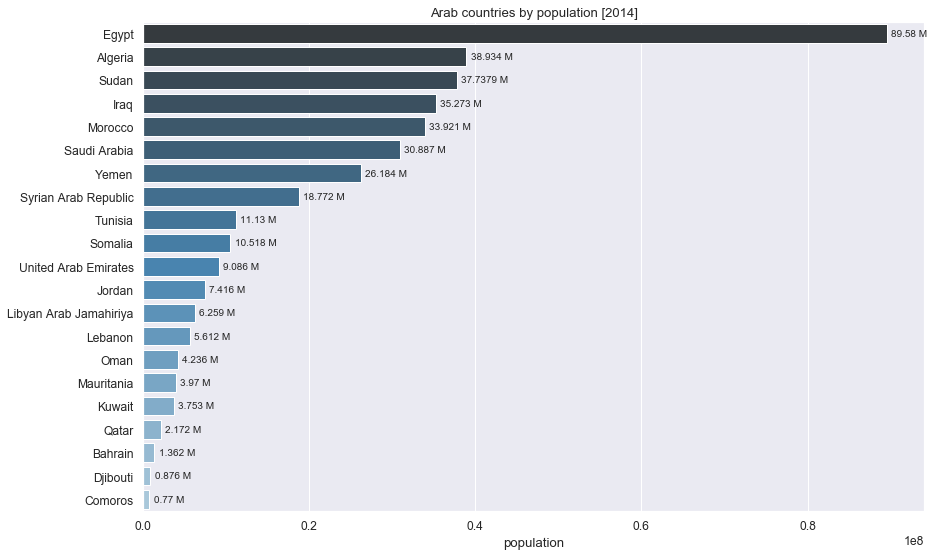

In [10]:
fig = plt.figure(figsize=(14,9))
ax = sns.barplot(population_df['population'],population_df['countery'], palette="Blues_d")
population_list = list (np.array(population_df['population'])/10**6)
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(population_list[list_counter])+" M" , (x.max()+500000, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center')
    list_counter += 1
plt.ylabel("")
plt.title("Arab countries by population [2014]")

print ("The total Population of Arab countries in 2014 according to the available data and with adding Sudan is: {0}".format(np.sum(population_df['population'])))


**Population growth  comparison**

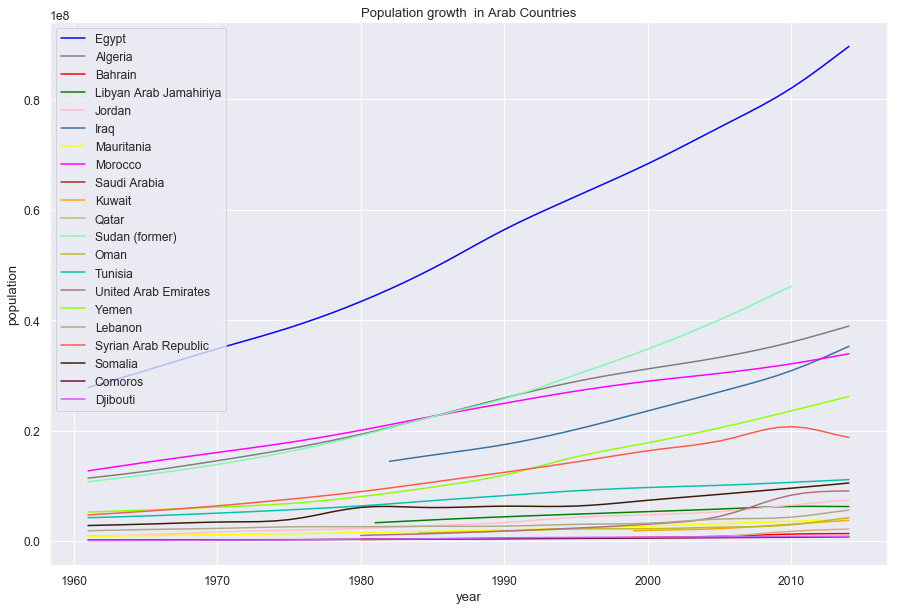

In [11]:
plt.figure(figsize=(15,10))
for i in range(len(arab_countries)):
    country_by_record = extract_country_by_record(arab_df,arab_countries[i],'BiocapPerCap')
    sns.lineplot(country_by_record['year'],country_by_record['population'],
             label=arab_countries[i],
             color = colors[i])
    
# plt.gca().set_color_cycle(colors)
plt.legend()
plt.title("Population growth  in Arab Countries")
plt.show()

**Population growth rate**

In [12]:
population_2000,available_countries,excluded_countries_2000=extract_countries_feature_by_year(arab_df,arab_countries,'population',2000)
population_2010,available_countries,excluded_countries_2010=extract_countries_feature_by_year(arab_df,arab_countries,'population',2010)
population_growth_rate = []
for i in range (0,len(population_2000)):
    growth_rate = calculate_growth_rate(population_2010[i],population_2000[i],10)
    population_growth_rate.append(growth_rate)
growth_rate_df = pd.DataFrame({"country":available_countries,"growth rate":population_growth_rate}).sort_values(by="growth rate",ascending=False)
print_excluded_countries(excluded_countries_2000,2000)  
print_excluded_countries(excluded_countries_2010,2010)
growth_rate_df.index=np.arange(1,len(growth_rate_df)+1)
growth_rate_df

excluded countries from dataset in 2000 are : 
Saudi Arabia
excluded countries from dataset in 2010 are : 
Saudi Arabia


,country,growth rate
1,Qatar,19.780776
2,United Arab Emirates,17.308197
3,Bahrain,8.905547
4,Kuwait,5.857957
5,Jordan,3.673170
6,Lebanon,3.406491
7,Sudan (former),3.277831
8,Yemen,3.257657
9,Mauritania,3.246035
10,Oman,3.148727


Text(0.5,1,'Arab countries by annual population growth rate from [2000-2010]')

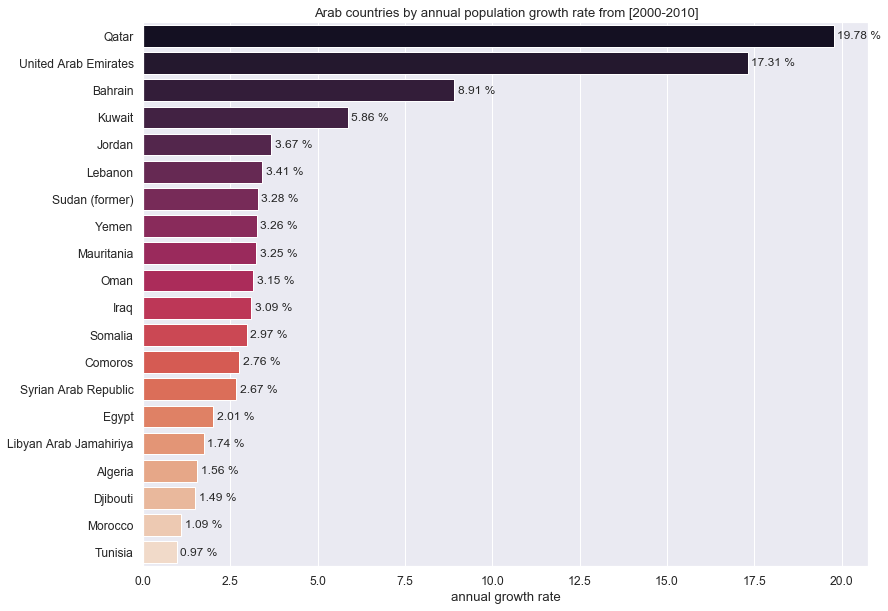

In [13]:
fig = plt.figure(figsize=(13,10))
ax = sns.barplot(growth_rate_df["growth rate"],growth_rate_df["country"],palette="rocket")
growth_rate_list = list(np.round(np.array(growth_rate_df["growth rate"]),2))
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(growth_rate_list[list_counter] )+ " %" , (x.max()+0.1, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center',size=12)
    list_counter += 1
plt.xlabel("annual growth rate")
plt.ylabel("")
plt.title("Arab countries by annual population growth rate from [2000-2010]")


The plot shows that the Gulf countries (Qatar, UAE, Kuwait, Baharin) had the highest population growth from 2000 to 2010.The Gulf countries is the richest countries in the Arab world and one of the richest regions in the world. In this period they had a high immigration rate from the other arab countries and from other Asian countries. So, I think that is the reason why they had such a high growth rate. 

In [14]:
arab_countrs_population = []
for year in years:
    sum_population_per_year = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'population',year)[0]).sum()
    arab_countrs_population.append(sum_population_per_year)


Text(1985,3.1e+08,'growth rate = 3.28%')

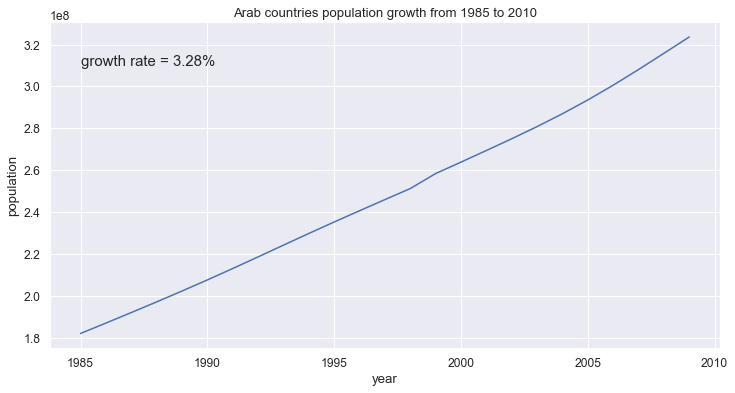

In [15]:
fig = plt.figure(figsize=(12,6))
# The period from 1985 to 2010
sns.lineplot(years[24:49],arab_countrs_population[24:49])
plt.xlabel("year")
plt.ylabel("population")
plt.title("Arab countries population growth from 1985 to 2010")
arab_population_growth_rate = calculate_growth_rate(arab_countrs_population[49],arab_countrs_population[24],25)
plt.text(1985,3.1*10**8,"growth rate = {0}%".format(np.round(arab_population_growth_rate,2)),size=15)


In the growth rate analysis the period from 1985 to 2010 is chosen because all the countries has available data in this period exept for Kuwait which had avilable data forom the begining of 1999 and Saudi Arabia which is not included as its data is available only in 2014 .

# Gross Domestic Product (GDP) analysis

Gross domestic product (GDP) is the best way to measure a country's economy. GDP is the total value of all products produced by the people and companies in the country. It doesn't matter if they are citizens or foreign-owned companies. If they are located within the country's boundaries, the government counts their production as GDP.
In the dataset there is the GDP per Capita for countries which is considered a better way to compare the GDP between them. This divides GDP by the population.So, It’s a good way to measure  the country's standard of living.


**The  countries by GDP**

excluded countries from dataset in 2014 are : 
Libyan Arab Jamahiriya
Sudan (former)
Syrian Arab Republic
Somalia


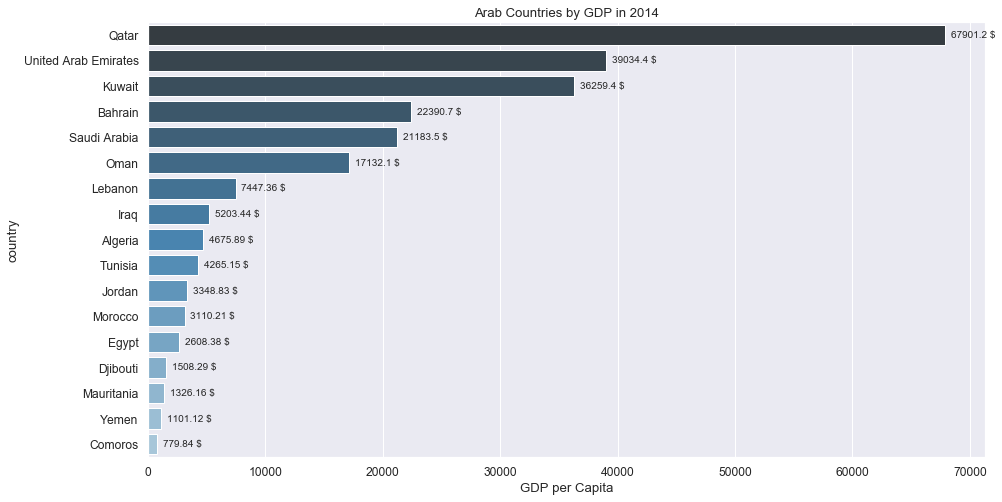

In [16]:
fig = plt.figure(figsize=(15,8))
GDP,available_countries, excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'Percapita GDP (2010 USD)',2014)
GDP_df = pd.DataFrame({'country':available_countries,'GDP':GDP}).sort_values(by='GDP',ascending=False)
ax=sns.barplot(GDP_df['GDP'],GDP_df['country'],palette="Blues_d")
gdp_list = list (GDP_df['GDP'])
list_counter = 0
# annotating the values
for p in ax.patches:        
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[:,1]
    ax.annotate(str(gdp_list[list_counter] )+ " $" , (x.max()+500, y.mean()), 
                horizontalalignment='left',
                verticalalignment='center')
    list_counter += 1
plt.xlabel("GDP per Capita")
plt.title("Arab Countries by GDP in 2014")
print_excluded_countries(excluded_countries,2014)


The analysis shows that Qatar has the highest GDP per Capita in the arab countries and Comoros has the lowest one . It is reflecting the fact that Qatar is one of the richest countries in the world supported by its wealth from exploiting its natural gas reserves and the newest member in arab league Comoros is considerd one of the poorest countries in the world. 

**Comparison between arab countries GDP over years **

Text(0.5,1,'Percapita GDP for Arab Contries')

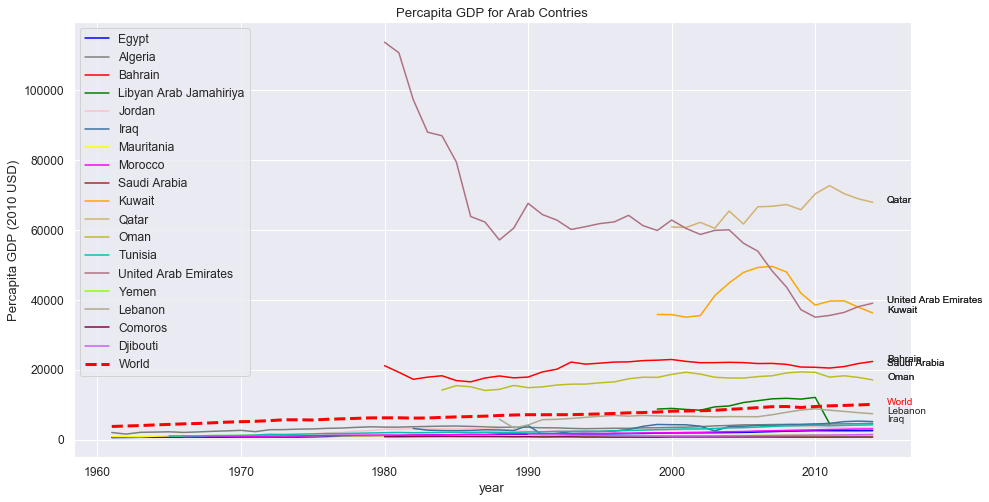

In [17]:
plt.figure(figsize=(15,8))
for i in range(len(arab_countries)):
    country_by_record = extract_country_by_record(arab_df,arab_countries[i],'BiocapPerCap')
    sns.lineplot(country_by_record['year'],
                 country_by_record['Percapita GDP (2010 USD)'], 
                 label=arab_countries[i],color = colors[i])
    y_text_label = country_by_record.loc[lambda df: country_by_record.year == 2014]['Percapita GDP (2010 USD)'].values 
    if arab_countries[i] in list(GDP_df.country[0:8]) and y_text_label.size!=0 and not math.isnan(y_text_label[0]) :
        plt.text(2015,y_text_label[0], arab_countries[i])

    if arab_countries[i] in list(GDP_df.country[0:6]) and y_text_label.size!=0 and not math.isnan(y_text_label[0]) :
        plt.text(2015,y_text_label[0], arab_countries[i])
World_by_record = extract_country_by_record(data,'World','BiocapPerCap')
ax = sns.lineplot(World_by_record['year'],
             World_by_record['Percapita GDP (2010 USD)'], 
             label='World',color = 'red',linewidth=3) 
ax.lines[18].set_linestyle("--")
plt.text(2015,World_by_record.loc[lambda df: World_by_record.year == 2014]['Percapita GDP (2010 USD)'].values [0],'World',color='red')
# plt.gca().set_color_cycle(colors)
plt.legend()
plt.title("Percapita GDP for Arab Contries")

The figure shows that there are only 6 countries above world avarage GDP . The countries are (Qatar, United Arab Emirates, Kuwait, Saudi Arabia, Bahrain, Oman ) . They are the arab states of the Arabian Gulf  as they all border the body of water of that gulf. They are often referred to as "The Gulf Cooperation Council (GCC) states" or "Gulf countries".  The Gulf countries have  enormous oil and natural gas resources. In the past the oil and gas resources were the  backbone of the countries economoy. But recentely, they try to find another resources to support the economy such as the tourism and other investments. 
![Arab states of the Arabian Gulf](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Persian_Gulf_Arab_States_english.PNG/250px-Persian_Gulf_Arab_States_english.PNG)

The figure also shows that Libya had above world average GDP before 2010  but the political instability of the country from 2011 leads to this heavey drop on its GDP. and there is also some drop in Iraq GDP after 2003 due to the American invasion.


In [18]:
mean_GDP = []
for year in years :
    mean_GDP.append(np.array(extract_countries_feature_by_year(arab_df,arab_countries,'Percapita GDP (2010 USD)',year)[0]).mean())

**Mean value of the GDP **

Text(0.5,1,'Mean of the GDP from 2000 to 2014')

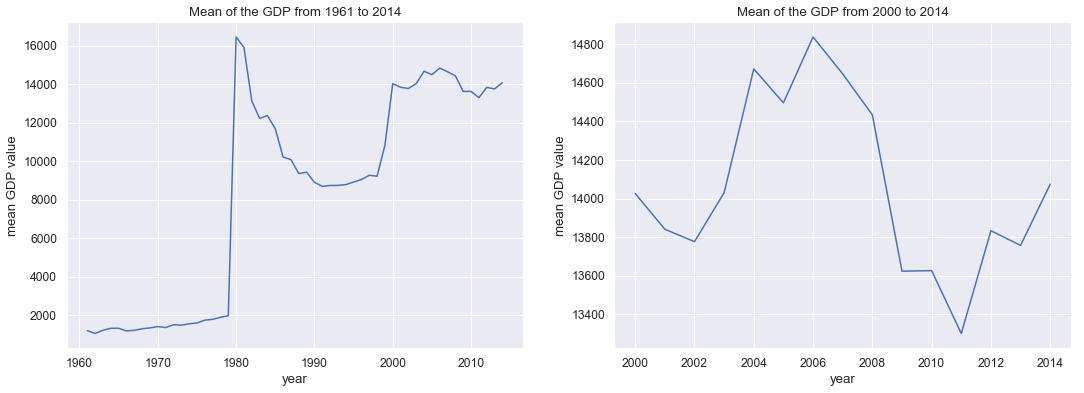

In [19]:
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))          # plot GDP from 1961 to 2014
sns.lineplot(years, mean_GDP)
plt.xlabel("year")
plt.ylabel("mean GDP value")
plt.title("Mean of the GDP from 1961 to 2014")
plt.subplot2grid((1,2),(0,1))           # plot GDP from 2000 to 2014 
sns.lineplot(years[39:], mean_GDP[39:])
plt.xlabel("year")
plt.ylabel("mean GDP value")
plt.title("Mean of the GDP from 2000 to 2014")


The first plot shows the mean value of the GDP from 1961 to 2014. But the dataset dose not have the GDP data of the gulf countries before 1980 and after adding United Arab Emirates to the calcultion the spike occurs at 1980. From 2000 to 2014 most of GDP data for countries are available expet for Saudi Arabia which has available data only in 2014.


# Ecological footprint analysis
[The Ecological footprint ](https://en.wikipedia.org/wiki/Ecological_footprint) is a way to measure the interaction between people and the enviroment or nature by measuring the needs of people from nature and the ability of nature to renew this needs. so, the footprint depends heavily on the number of people and thier ways and behaviors in consumption the natural resources.

The biocapacity is the way to represent the available amount of natural resources for human consumptions. The biocapacity of an area is calculated by multiplying the actual physical area by the yield factor and the appropriate equivalence factor. 
 

**Correlation between features according to ecological footprint **

Text(0.5,1,'Correlation between features according to ecological footprint (per person)')

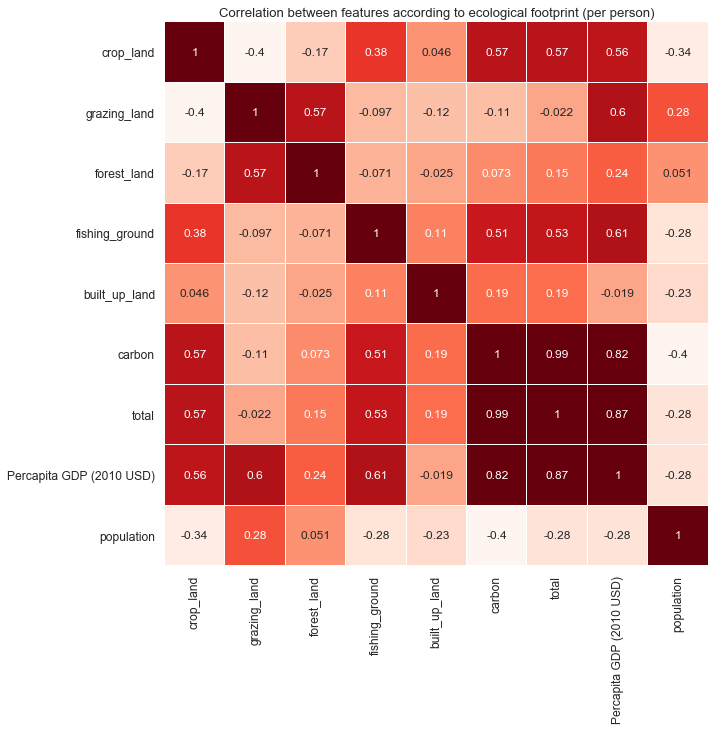

In [20]:
arab_consumption_corr=arab_df[arab_df.record.isin(["EFConsPerCap"])].drop('year',axis=1).corr()
fig=plt.figure(figsize=(10, 10))
sns.heatmap(arab_consumption_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Reds',linecolor="white",cbar=False,annot_kws={"size":12})
plt.title('Correlation between features according to ecological footprint (per person)')

The plot shows that the strong correlation between the total consumption and the GDP. The higher the GDP the higher the consumption.

**Correlation between features according to biocapcity**

Text(0.5,1,'Correlation between features according to biocapcity')

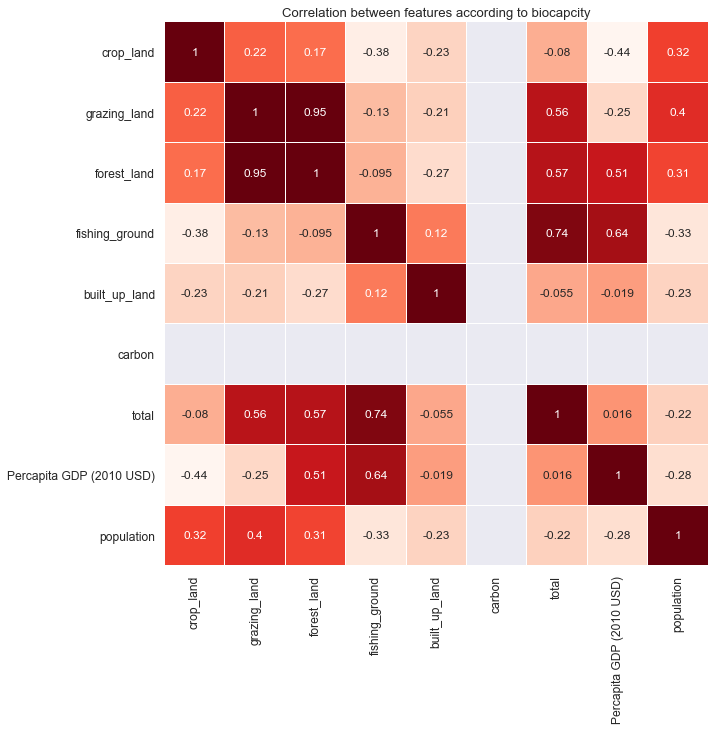

In [21]:
biocapcity_corr=arab_df[arab_df.record.isin(["BiocapPerCap"])].drop('year',axis=1).corr()
fig=plt.figure(figsize=(10, 10))
sns.heatmap(biocapcity_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Reds',linecolor="white",cbar=False,annot_kws={"size":12})
plt.title('Correlation between features according to biocapcity')

**Countries by Biocapacity and Ecological Footprint**

The high the gab between the biocapacity and the consumption for biocapacity means that the country has the enough natural resources to cover its needs. So, in this section we will analyse the available data for biocapacity and Ecological Footprint Consumption (EFCons) to see if the resources is enough to cover people consumption.  

excluded countries from dataset in 2014 are : 
Sudan (former)


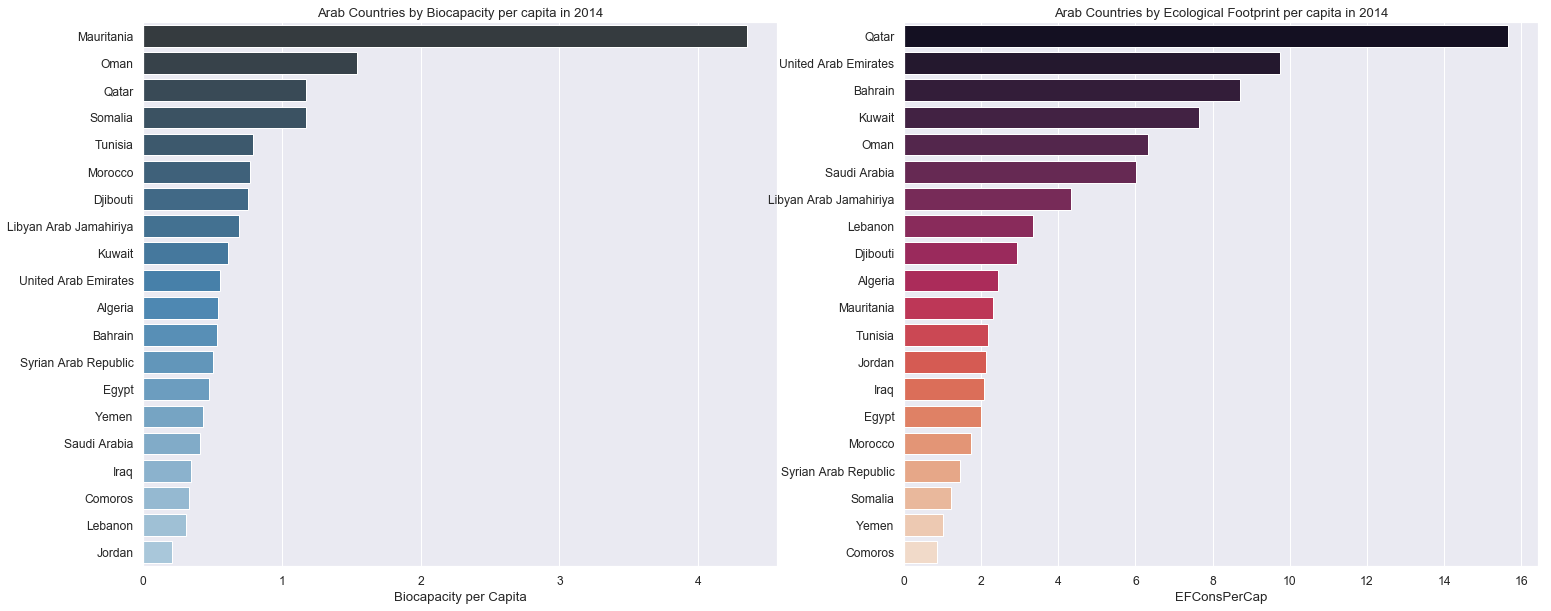

In [22]:
fig = plt.figure(figsize=(25,10))
plt.subplot2grid((1,2),(0,0))
BiocapPerCap,available_countries,excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'total',2014)
BiocapPerCap_df = pd.DataFrame({'country':available_countries,'BiocapPerCap':BiocapPerCap}).sort_values(by='BiocapPerCap',ascending=False)
ax=sns.barplot(BiocapPerCap_df['BiocapPerCap'],BiocapPerCap_df['country'],palette="Blues_d")

plt.xlabel("Biocapacity per Capita")
plt.ylabel("")

plt.title("Arab Countries by Biocapacity per capita in 2014")

plt.subplot2grid((1,2),(0,1))
EFConsPerCap,available_countries,excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'total',2014,record="EFConsPerCap")
EFConsPerCap_df = pd.DataFrame({'country':available_countries,'EFConsPerCap':EFConsPerCap}).sort_values(by='EFConsPerCap',ascending=False)
ax=sns.barplot(EFConsPerCap_df['EFConsPerCap'],EFConsPerCap_df['country'],palette="rocket")
plt.xlabel("EFConsPerCap")
plt.title("Arab Countries by Ecological Footprint per capita in 2014")
plt.ylabel("")
print_excluded_countries(excluded_countries,2014)

Text(0.5,1,'Arab Countries Biocapacity per capita')

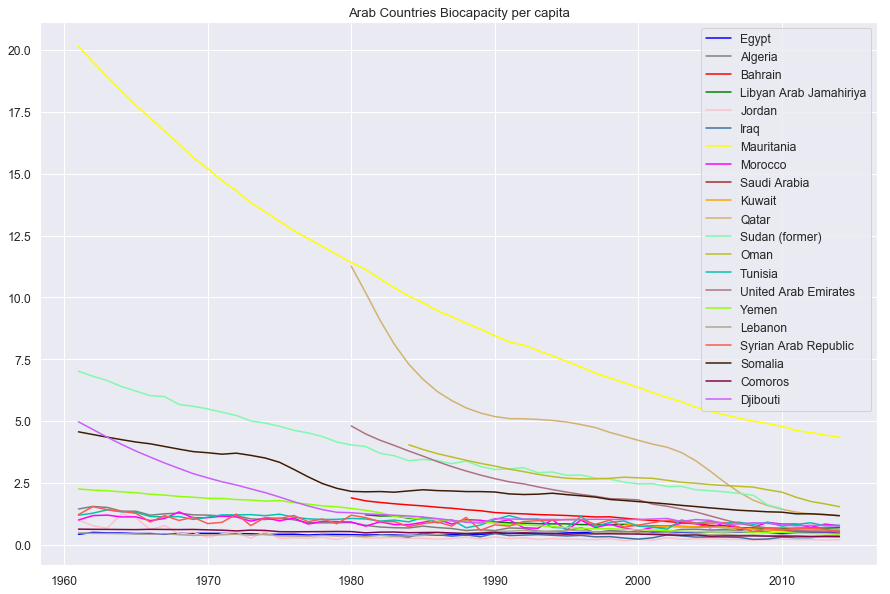

In [23]:
plt.figure(figsize=(15,10))
for i in range(len(arab_countries)):
    plt.plot(extract_country_by_record(arab_df,arab_countries[i],'BiocapPerCap')['year'],
             extract_country_by_record(arab_df,arab_countries[i],'BiocapPerCap')['total'], 
             label=arab_countries[i],
             color = colors[i])
    
# plt.gca().set_color_cycle(colors)
plt.legend()
plt.title("Arab Countries Biocapacity per capita")

**Ecological Footprint vs Biocapcity for  Egypt**

As it is the biggest country in the Arab World and one of the biggest in the Middle East area.  So, it is the highest contributor in the calculation.

Text(0.5,1,' Ecological Footprint vs Biocapacity for Egypt (gha)')

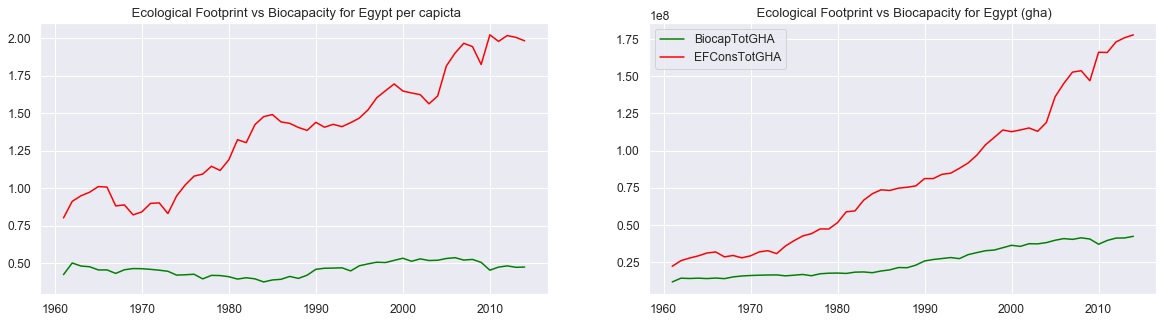

In [24]:
plt.figure(figsize=(20,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(extract_country_by_record(arab_df,'Egypt','BiocapPerCap')['year'],
         extract_country_by_record(arab_df,'Egypt','BiocapPerCap')['total'],
         color='green',
         label = 'BiocapTotGHA')
plt.plot(extract_country_by_record(arab_df,'Egypt','EFConsPerCap')['year'],
         extract_country_by_record(arab_df,'Egypt','EFConsPerCap')['total'],
         color='red',
         label = 'EFConsTotGHA')
plt.title(" Ecological Footprint vs Biocapacity for Egypt per capicta")
plt.subplot2grid((1,2),(0,1))
plt.plot(extract_country_by_record(arab_df,'Egypt','BiocapTotGHA')['year'],
         extract_country_by_record(arab_df,'Egypt','BiocapTotGHA')['total'],
         color='green',
         label = 'BiocapTotGHA')
plt.plot(extract_country_by_record(arab_df,'Egypt','EFConsTotGHA')['year'],
         extract_country_by_record(arab_df,'Egypt','EFConsTotGHA')['total'],
         color='red',
         label = 'EFConsTotGHA')    
# plt.gca().set_color_cycle(colors)
plt.legend()
plt.title(" Ecological Footprint vs Biocapacity for Egypt (gha)")

**Ecological Footprint vs Biocapcity  for the remaing countries**


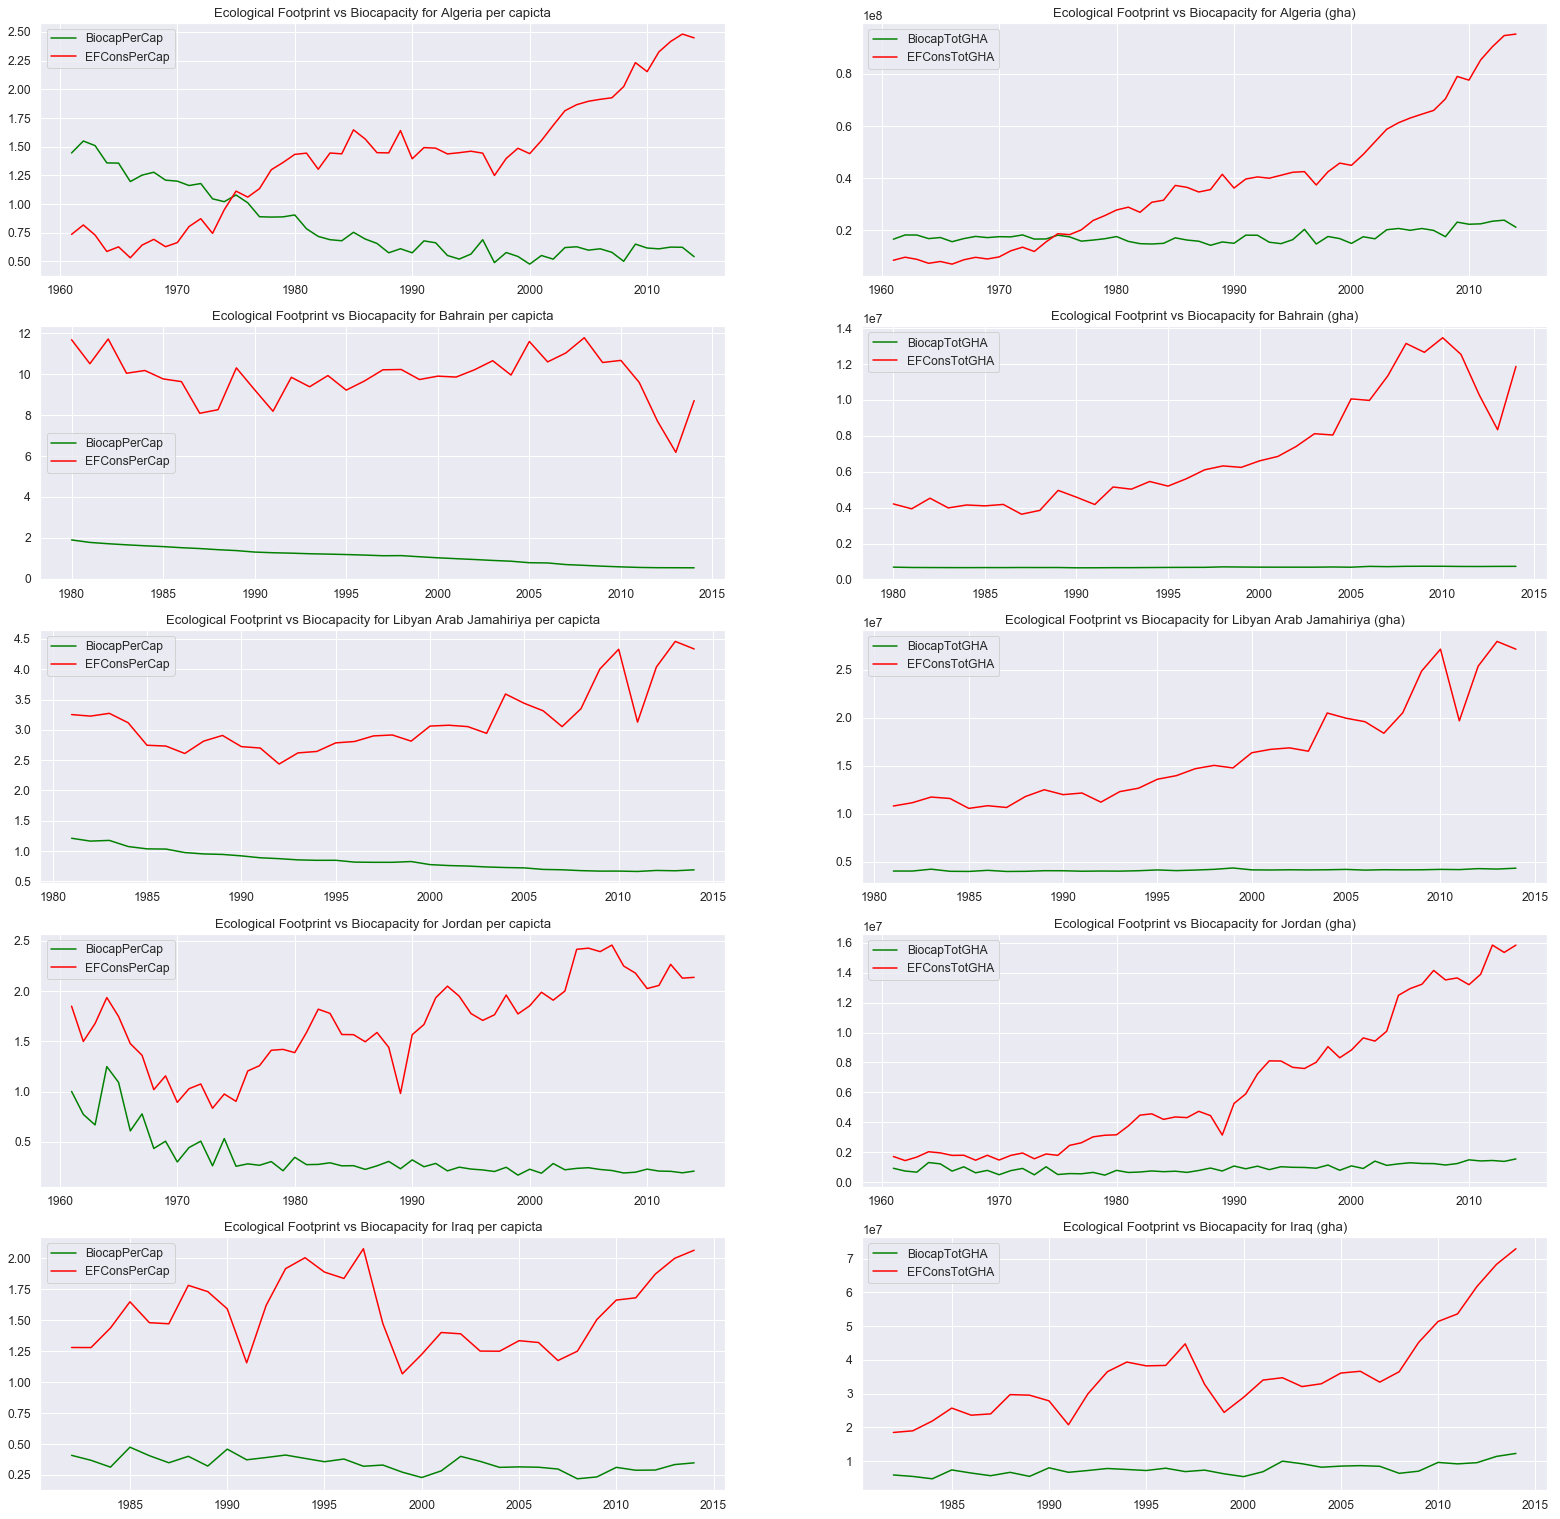

In [25]:
fig=plt.figure(figsize=(27,27))
count = 1 
record ={0:['BiocapPerCap','EFConsPerCap'],1:['BiocapTotGHA','EFConsTotGHA']}
for i in range (0,5):
#     for j in range (0,2):
    for r in record.keys():
        plt.subplot2grid((5,2),(i,r))
        plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][0])['year'],
                     extract_country_by_record(arab_df,arab_countries[count],record[r][0])['total'],
                     color='green',
                     label = record[r][0])
        plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][1])['year'],
                     extract_country_by_record(arab_df,arab_countries[count],record[r][1])['total'],
                     color='red',
                     label = record[r][1])
        plt.legend()
        if(r==0):
            plt.title("Ecological Footprint vs Biocapacity for {0} per capicta".format(arab_countries[count]))
        else:
            plt.title("Ecological Footprint vs Biocapacity for {0} (gha)".format(arab_countries[count]))
            
    count +=1

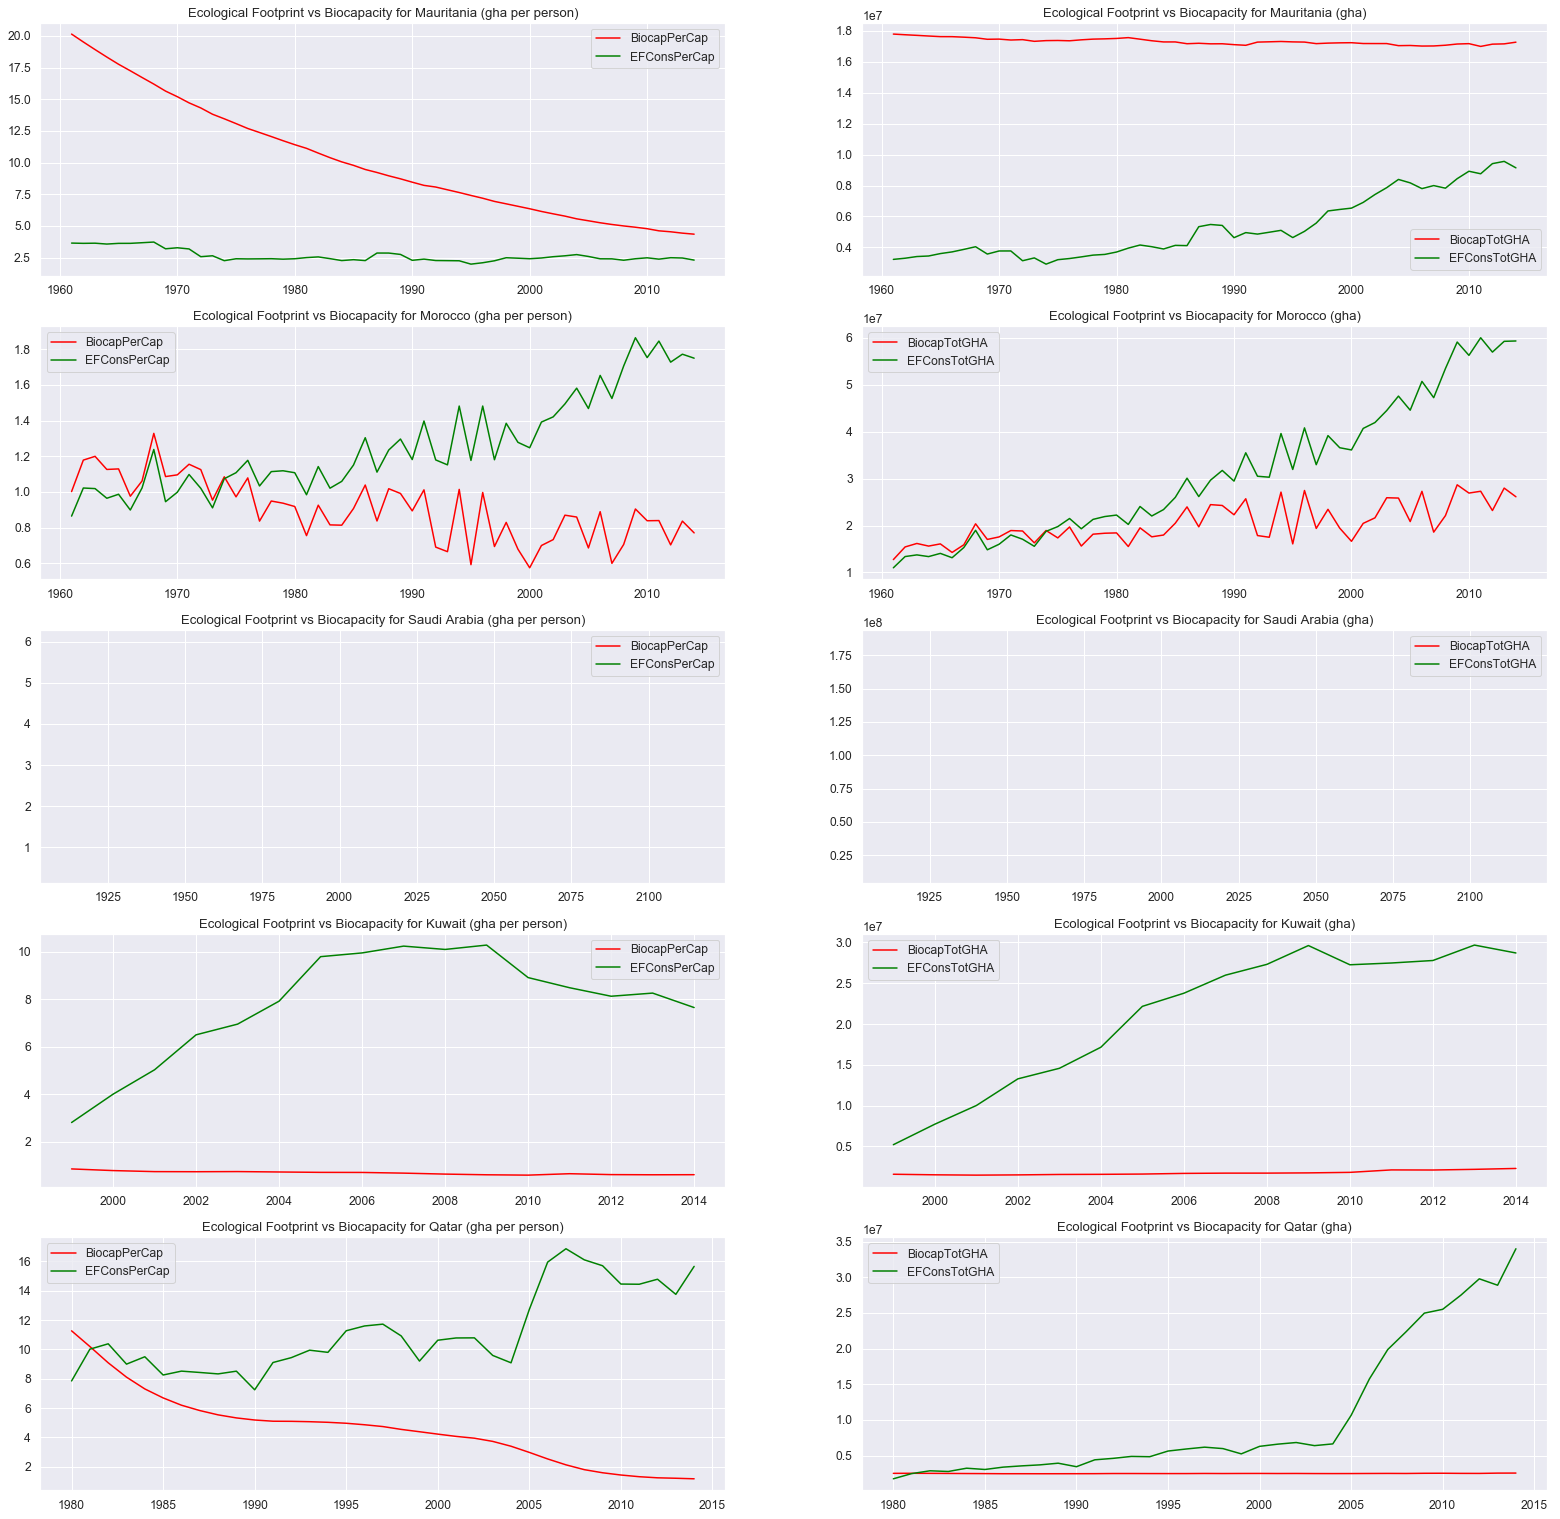

In [26]:
fig=plt.figure(figsize=(27,27))
for i in range (0,5):
#     for j in range (0,2):
    for r in record.keys():
        plt.subplot2grid((5,2),(i,r))
        plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][0])['year'],
                     extract_country_by_record(arab_df,arab_countries[count],record[r][0])['total'],
                     color='red',
                     label = record[r][0])
        plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][1])['year'],
                     extract_country_by_record(arab_df,arab_countries[count],record[r][1])['total'],
                     color='green',
                     label = record[r][1])
        plt.legend()
        if(r==0):
            plt.title("Ecological Footprint vs Biocapacity for {0} (gha per person)".format(arab_countries[count]))
        else:
            plt.title("Ecological Footprint vs Biocapacity for {0} (gha)".format(arab_countries[count]))
            
    count +=1

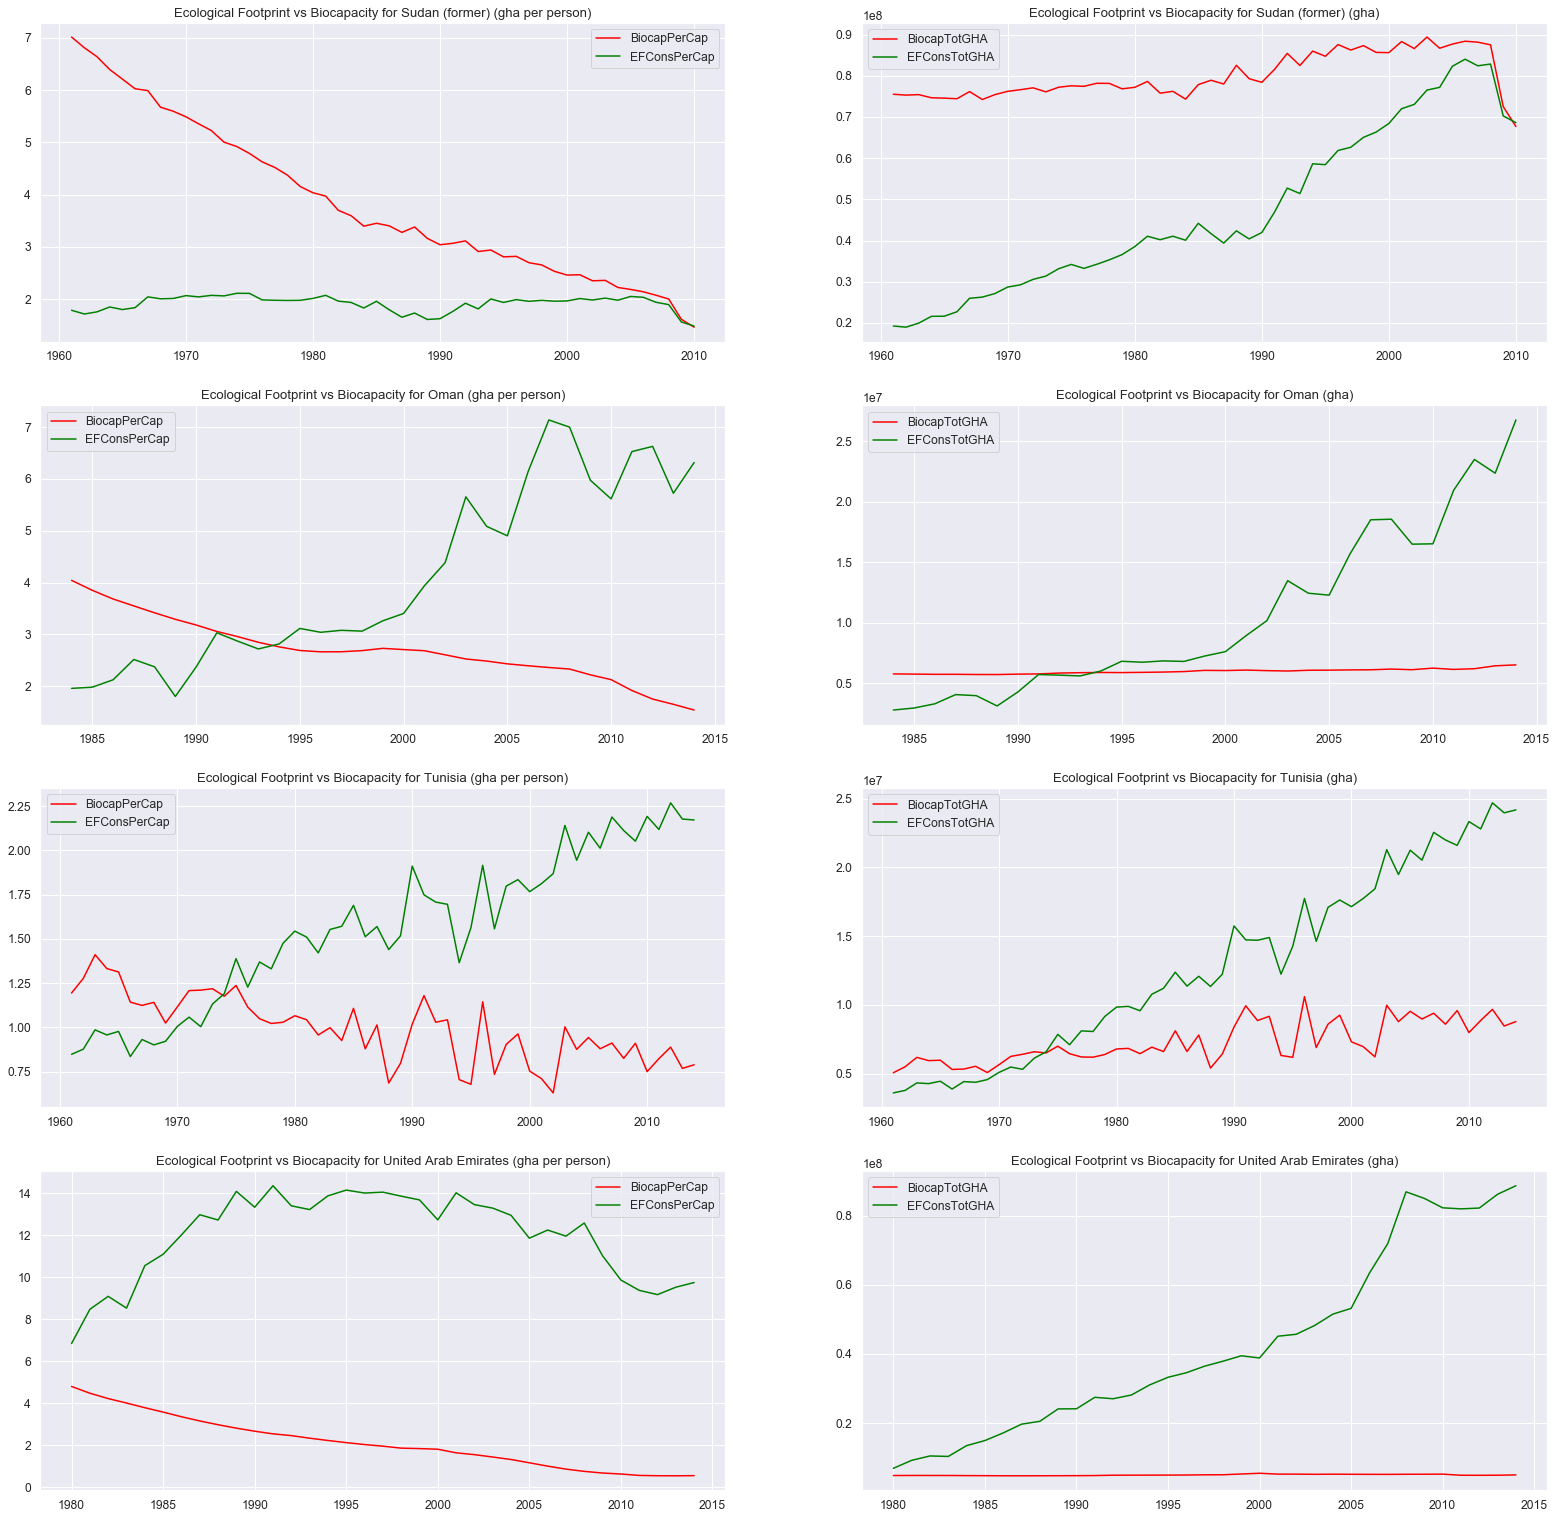

In [27]:
fig=plt.figure(figsize=(27,27))
for i in range (0,4):
    if count < len(arab_countries):
        for r in record.keys():
            plt.subplot2grid((4,2),(i,r))
            plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][0])['year'],
                         extract_country_by_record(arab_df,arab_countries[count],record[r][0])['total'],
                         color='red',
                         label = record[r][0])
            plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][1])['year'],
                         extract_country_by_record(arab_df,arab_countries[count],record[r][1])['total'],
                         color='green',
                         label = record[r][1])
            plt.legend()
            if(r==0):
                plt.title("Ecological Footprint vs Biocapacity for {0} (gha per person)".format(arab_countries[count]))
            else:
                plt.title("Ecological Footprint vs Biocapacity for {0} (gha)".format(arab_countries[count]))

        count +=1

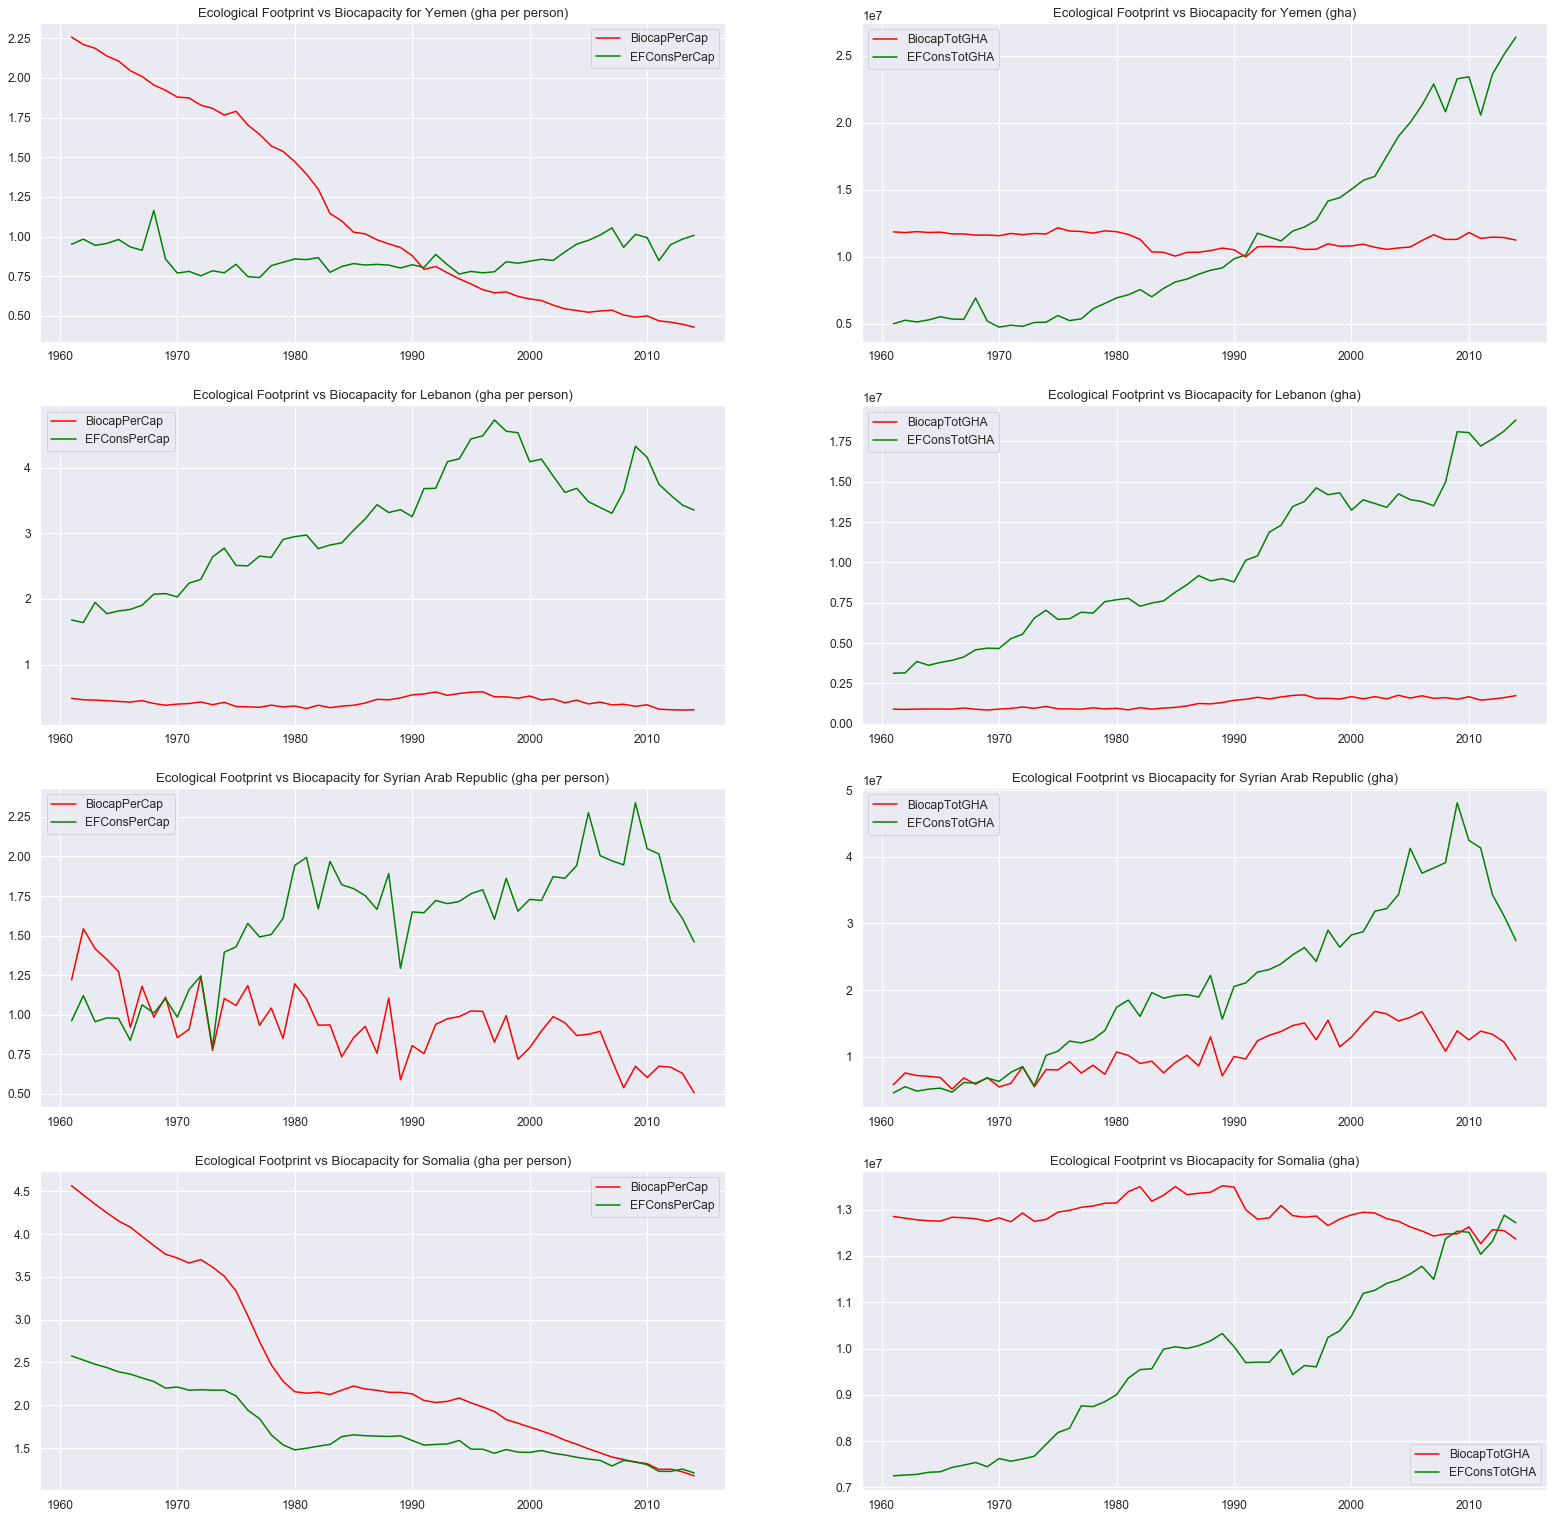

In [28]:
fig=plt.figure(figsize=(27,27))
for i in range (0,4):
    if count < len(arab_countries):
        for r in record.keys():
            plt.subplot2grid((4,2),(i,r))
            plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][0])['year'],
                         extract_country_by_record(arab_df,arab_countries[count],record[r][0])['total'],
                         color='red',
                         label = record[r][0])
            plt.plot(extract_country_by_record(arab_df,arab_countries[count],record[r][1])['year'],
                         extract_country_by_record(arab_df,arab_countries[count],record[r][1])['total'],
                         color='green',
                         label = record[r][1])
            plt.legend()
            if(r==0):
                plt.title("Ecological Footprint vs Biocapacity for {0} (gha per person)".format(arab_countries[count]))
            else:
                plt.title("Ecological Footprint vs Biocapacity for {0} (gha)".format(arab_countries[count]))

        count +=1

**All countries as one big country**

In [29]:
Arab_BiocapTotal = []
Arab_EFConsTotal = []
Arab_BiocapPerCap = []
Arab_EFConsPerCap = []
world_BiocapTotal = []
world_EFConsTotal = []
mean_BiocapPerCap = []
mean_EFConsPerCap = []
for year in years :
    sum_BiocapTotal_value = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'total',year,record= 'BiocapTotGHA')[0]).sum()
    sum_EFConsTotal_value = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'total',year,record='EFConsTotGHA')[0]).sum()
    sum_population_per_year = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'population',year)[0]).sum()
    world_BiocapTotal.append(np.array(extract_countries_feature_by_year(data,['World'],'total',year,record= 'BiocapTotGHA')[0]))
    world_EFConsTotal.append(np.array(extract_countries_feature_by_year(data,['World'],'total',year,record= 'EFConsTotGHA')[0]))
    Arab_BiocapTotal.append(sum_BiocapTotal_value)
    Arab_EFConsTotal.append(sum_EFConsTotal_value)
    Arab_BiocapPerCap.append(sum_BiocapTotal_value/sum_population_per_year)
    Arab_EFConsPerCap.append(sum_EFConsTotal_value/sum_population_per_year)
    mean_BiocapPerCap.append(np.array(extract_countries_feature_by_year(arab_df,arab_countries,'total',year)[0]).mean())
    mean_EFConsPerCap.append(np.array(extract_countries_feature_by_year(arab_df,arab_countries,'total',year,record='EFConsPerCap')[0]).mean())

Text(0.5,1,'The Ecological Footprint vs Biocapacity for Arab countries (gha)')

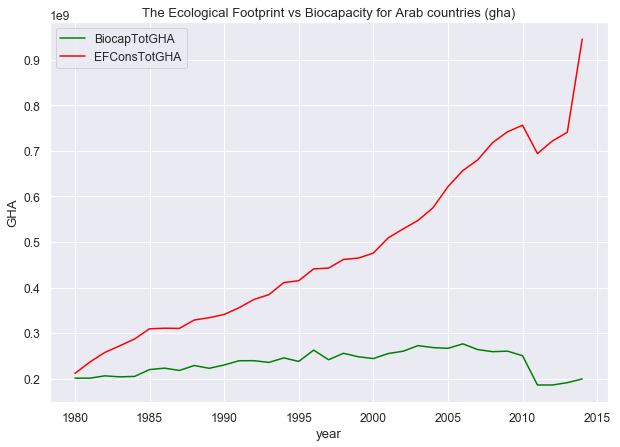

In [30]:
fig = plt.figure(figsize=(10,7))
sns.lineplot(years[19:], Arab_BiocapTotal[19:],color='green',label="BiocapTotGHA")
sns.lineplot(years[19:], Arab_EFConsTotal[19:],color='red',label="EFConsTotGHA")
plt.legend()
plt.xlabel("year")
plt.ylabel("GHA")
plt.title("The Ecological Footprint vs Biocapacity for Arab countries (gha)")


Text(0.5,1,'Mean of the Ecological Footprint vs Biocapacity for Arab countries (per capita)')

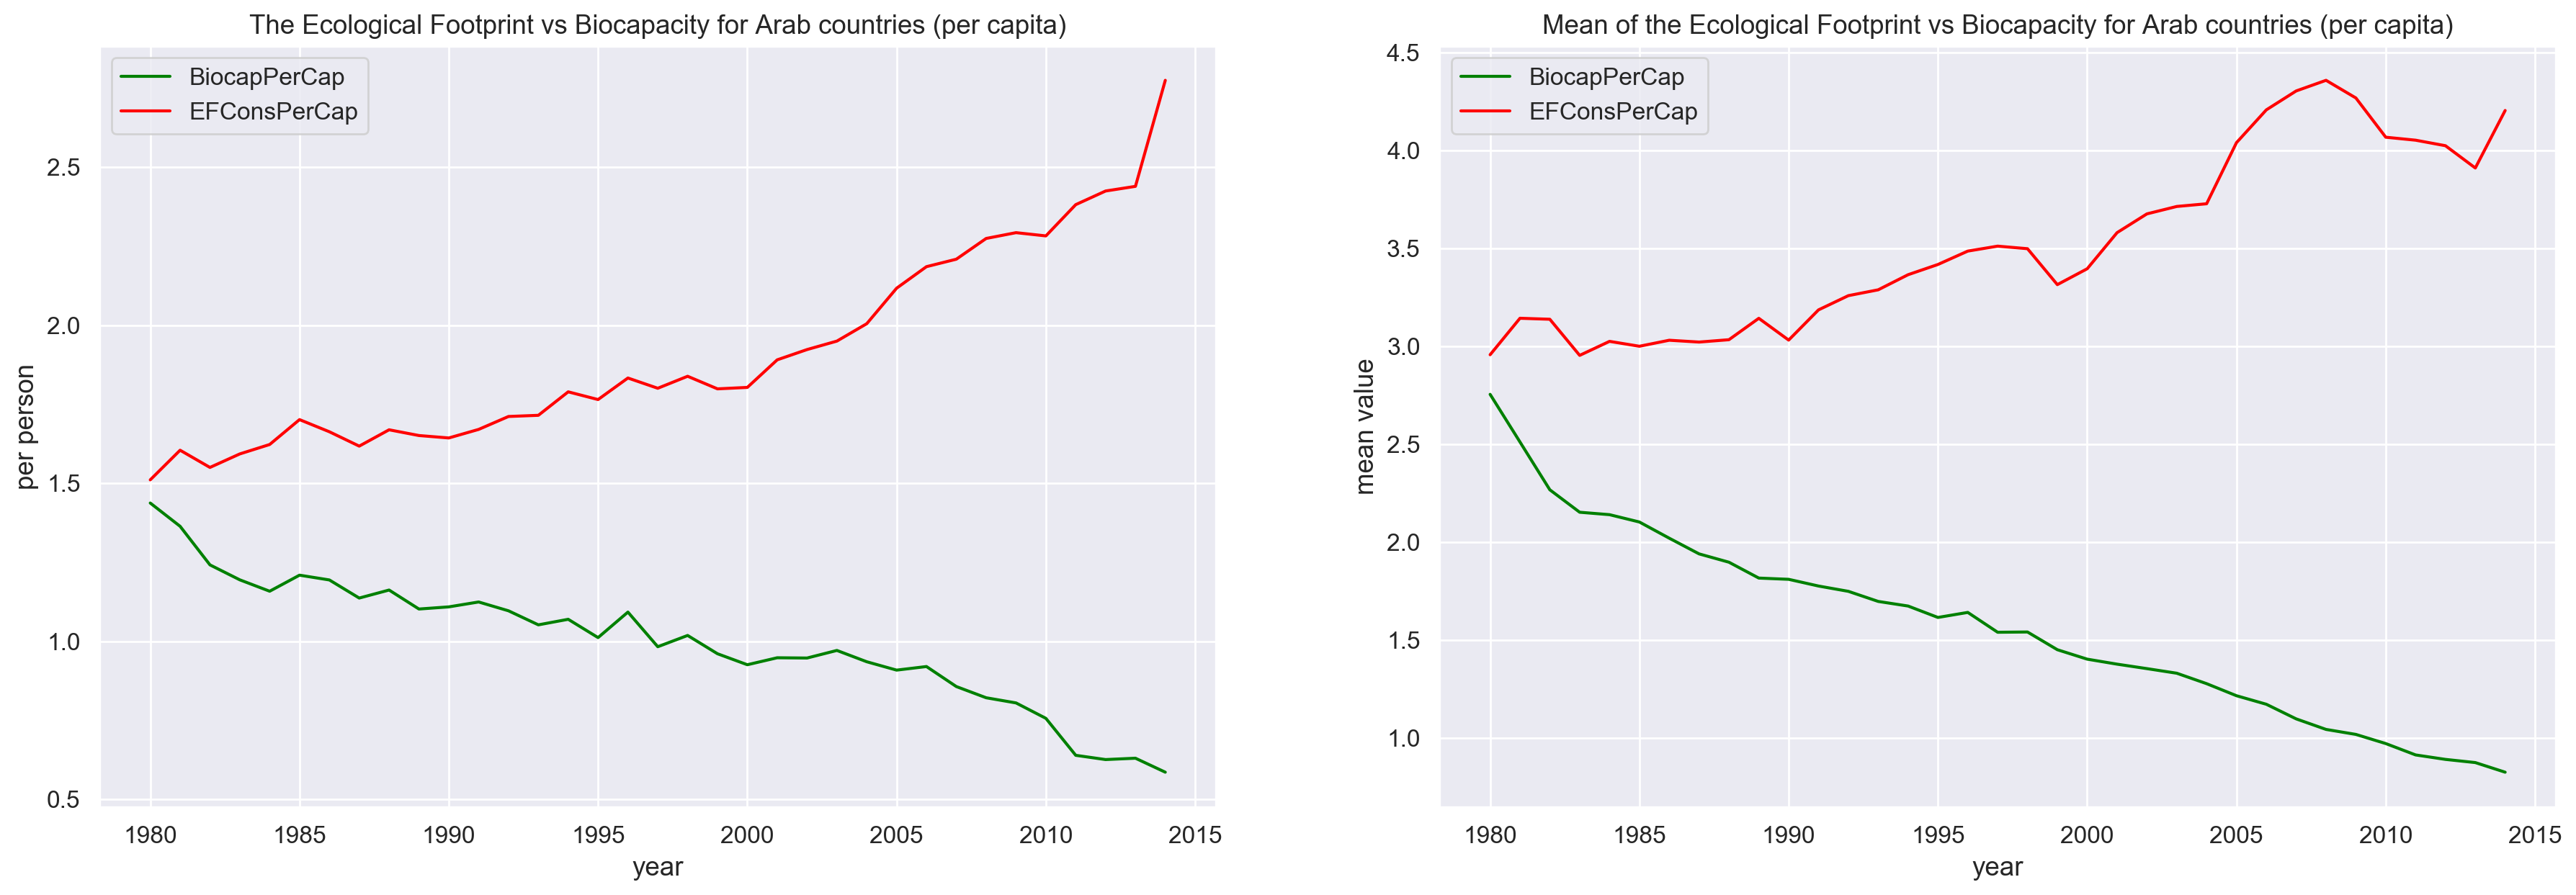

In [31]:
fig = plt.figure(figsize=(22,7))
fig.dpi=200
plt.subplot2grid((1,2),(0,0))
sns.lineplot(years[19:], Arab_BiocapPerCap[19:],color='green',label="BiocapPerCap")
sns.lineplot(years[19:], Arab_EFConsPerCap[19:],color='red',label="EFConsPerCap")
plt.legend()
plt.xlabel("year")
plt.ylabel("per person")
plt.title("The Ecological Footprint vs Biocapacity for Arab countries (per capita)")
plt.subplot2grid((1,2),(0,1))
sns.lineplot(years[19:], mean_BiocapPerCap[19:],color='green',label="BiocapPerCap")
sns.lineplot(years[19:], mean_EFConsPerCap[19:],color='red',label="EFConsPerCap")
plt.legend()
plt.xlabel("year")
plt.ylabel("mean value")
plt.title("Mean of the Ecological Footprint vs Biocapacity for Arab countries (per capita)")
# defict_res_2014 = mean_BiocapPerCap[-1] - mean_EFConsPerCap[-1]
# # if defict_res_2014 < 0 :
# #     print ("The arab countries in 2014 has an Ecological deficit by {0}".format(np.abs(defict_res_2014)))
# # else:
# #     print ("The arab countries in 2014 has an Ecological reserve by {0}".format(np.abs(defict_res_2014)))

The left plot shows the ecological footprint of all the arab countries as a one big country . The right plot shows the mean value of the ecological footprint of the countries as individuals.  The mean value plot has high values compared to the all countries as one plot . It indicates that there is a high variation in the ecological footprint  of countries as individuals which is shown in the previous plots.

**Analysing the Deficit/Reserve values of Ecological footprint**

The deficit happens if the needs of the country exeeds its natural resources ability to renew itself. It means that they need extra resources to cover their needs. In contrary, the reserve happens if the needs could be covered by the available natural resources of the country or region. 

In [32]:
difference  = []
countries_list = []
deficit_or_reserve = []
for country in arab_countries:
    BiocapPerCap=np.array(extract_countries_feature_by_year(arab_df,[country],'total',2014)[0])
    EFConsPerCap=np.array(extract_countries_feature_by_year(arab_df,[country],'total',2014,record="EFConsPerCap")[0])
    difference_value = BiocapPerCap - EFConsPerCap
    if difference_value < 0 :
        deficit_or_reserve.append ("deficit")
        difference.append(difference_value[0])
    if difference_value > 0 :
        deficit_or_reserve.append("reserve")
        difference.append(difference_value[0])
    if difference_value.size==0:
        deficit_or_reserve.append("nan")
        difference.append(np.NAN)
    countries_list.append(country)
defict_reserve_df = pd.DataFrame({"country":countries_list,"deficit/reserve":deficit_or_reserve,"value":difference}).dropna().sort_values(by="value",ascending=False)
defict_reserve_df.index=np.arange(1,len(defict_reserve_df)+1)
defict_reserve_df

C:\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
C:\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


,country,deficit/reserve,value
1,Mauritania,reserve,2.047657
2,Somalia,deficit,-0.033253
3,Comoros,deficit,-0.511552
4,Yemen,deficit,-0.578653
5,Syrian Arab Republic,deficit,-0.954422
6,Morocco,deficit,-0.979194
7,Tunisia,deficit,-1.383392
8,Egypt,deficit,-1.510680
9,Iraq,deficit,-1.718762
10,Algeria,deficit,-1.907225


Text(0.5,1,'Ecological Deficit/Reserve for Arab countries (per capita)')

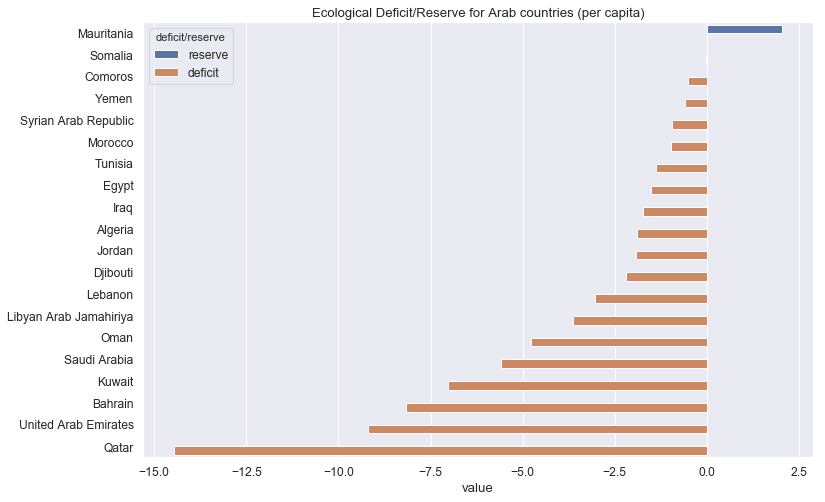

In [33]:
fig = plt.figure(figsize=(12,8))
sns.barplot(y=defict_reserve_df["country"], x=defict_reserve_df["value"],
                hue=defict_reserve_df["deficit/reserve"])
plt.ylabel("")
plt.title("Ecological Deficit/Reserve for Arab countries (per capita)")

After analysing the Ecological Footprint  vs Biocapacity in all  countries that has available data. We found that only Mauritania has reserved its resources and all the other countries has deficit ecological. 

The plot shows that the richest countries has the highest deficit and the poorest one has the lowest deficit. It indictes that the higher the income in the country the higher the consumption of its residents as they have the ability to buy more. The contrast happens with the poorest countries. 

**Calculate the Earth Overshoot Day**

Earth Overshoot Day (EOD), is the calculated illustrative calendar date on which humanity’s resource consumption for the year exceeds Earth’s capacity to regenerate those resources that year. Earth Overshoot Day is calculated by dividing the world biocapacity (the amount of natural resources generated by Earth that year).

$\mathbf {Earth Overshoot Day = (  Biocapacity  /   Ecological Footprint ) x 365}$

In [34]:
import datetime
arab_eod_dates = []
eod_dates_world=[]
def calc_earth_overshot_day(biocap,ecofootp):
    eod = (np.array(biocap) / np.array(ecofootp))*365
    return eod
eod_arab = calc_earth_overshot_day(Arab_BiocapTotal,Arab_EFConsTotal)
eod_world = calc_earth_overshot_day(world_BiocapTotal,world_EFConsTotal)

for i in range (0,len(eod_arab)):
    if eod_arab[i]>365:
        arab_eod_dates.append("no EOD")
    if eod_world[i]>365:
        eod_dates_world.append("no EOD")
    if eod_arab[i] < 365:
        date_arab = datetime.datetime(years[i],1,1) + datetime.timedelta(days=eod_arab[i])
        arab_eod_dates.append(date_arab.strftime('%b-%d'))
    if eod_world[i] < 365:
        date_world = datetime.datetime(years[i],1,1) + datetime.timedelta(days=int(eod_world[i]))
        eod_dates_world.append(date_world.strftime('%b-%d'))
eod_df = pd.DataFrame({"year":years[19:]," Arab Earth Overshoot Day":arab_eod_dates[19:]," World Earth Overshoot Day":eod_dates_world[19:]})
eod_df.set_index('year')

,Arab Earth Overshoot Day,World Earth Overshoot Day
year,,
1980,Dec-13,Nov-03
1981,Nov-07,Nov-11
1982,Oct-20,Nov-15
1983,Oct-01,Nov-14
1984,Sep-17,Nov-05
1985,Sep-17,Nov-04
1986,Sep-20,Oct-30
1987,Sep-14,Oct-23
1988,Sep-11,Oct-14


# Carbon Footprint

The carbon footprint is the required amount of forest land to absorb the emitted carbon. 

**Arab Countries by Eecological Footprint of Carbon Consumbtion (per person) in 2014**

excluded countries from dataset in 2014 are : 
Egypt
Sudan (former)
Comoros


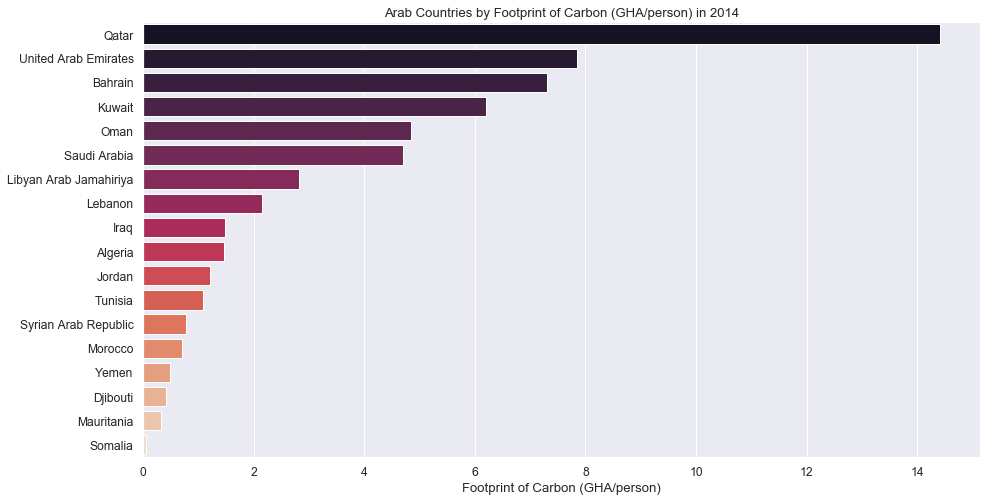

In [35]:
fig = plt.figure(figsize=(15,8))
Arab_carbon,available_countries,excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'carbon',2014,record="EFConsPerCap")
carbon_df = pd.DataFrame({'country':available_countries,'carbon':Arab_carbon}).sort_values(by='carbon',ascending=False)
ax=sns.barplot(carbon_df['carbon'],carbon_df['country'],palette="rocket")
plt.xlabel("Footprint of Carbon (GHA/person)")
plt.ylabel("")
plt.title("Arab Countries by Footprint of Carbon (GHA/person) in 2014")
print_excluded_countries(excluded_countries,2014)

The higher GDP countries have the larger carbon footprint per person. 

**The Ecological Footprint of Carbon for Arab Countries**

In [36]:
Arab_EFConsCarbonPerCap=[]
Arab_EFConsCarbonTot =[]
for i in range (len(years)):
    sum_EFConsCarbonTot_value = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'carbon',years[i],record='EFConsTotGHA')[0]).sum()
    Arab_EFConsCarbonTot.append(sum_EFConsCarbonTot_value)
    Arab_EFConsCarbonPerCap.append(sum_EFConsCarbonTot_value/arab_countrs_population[i])

Text(0.5,1,'The Ecological Footprint of Carbon for Arab Countries(per capita)')

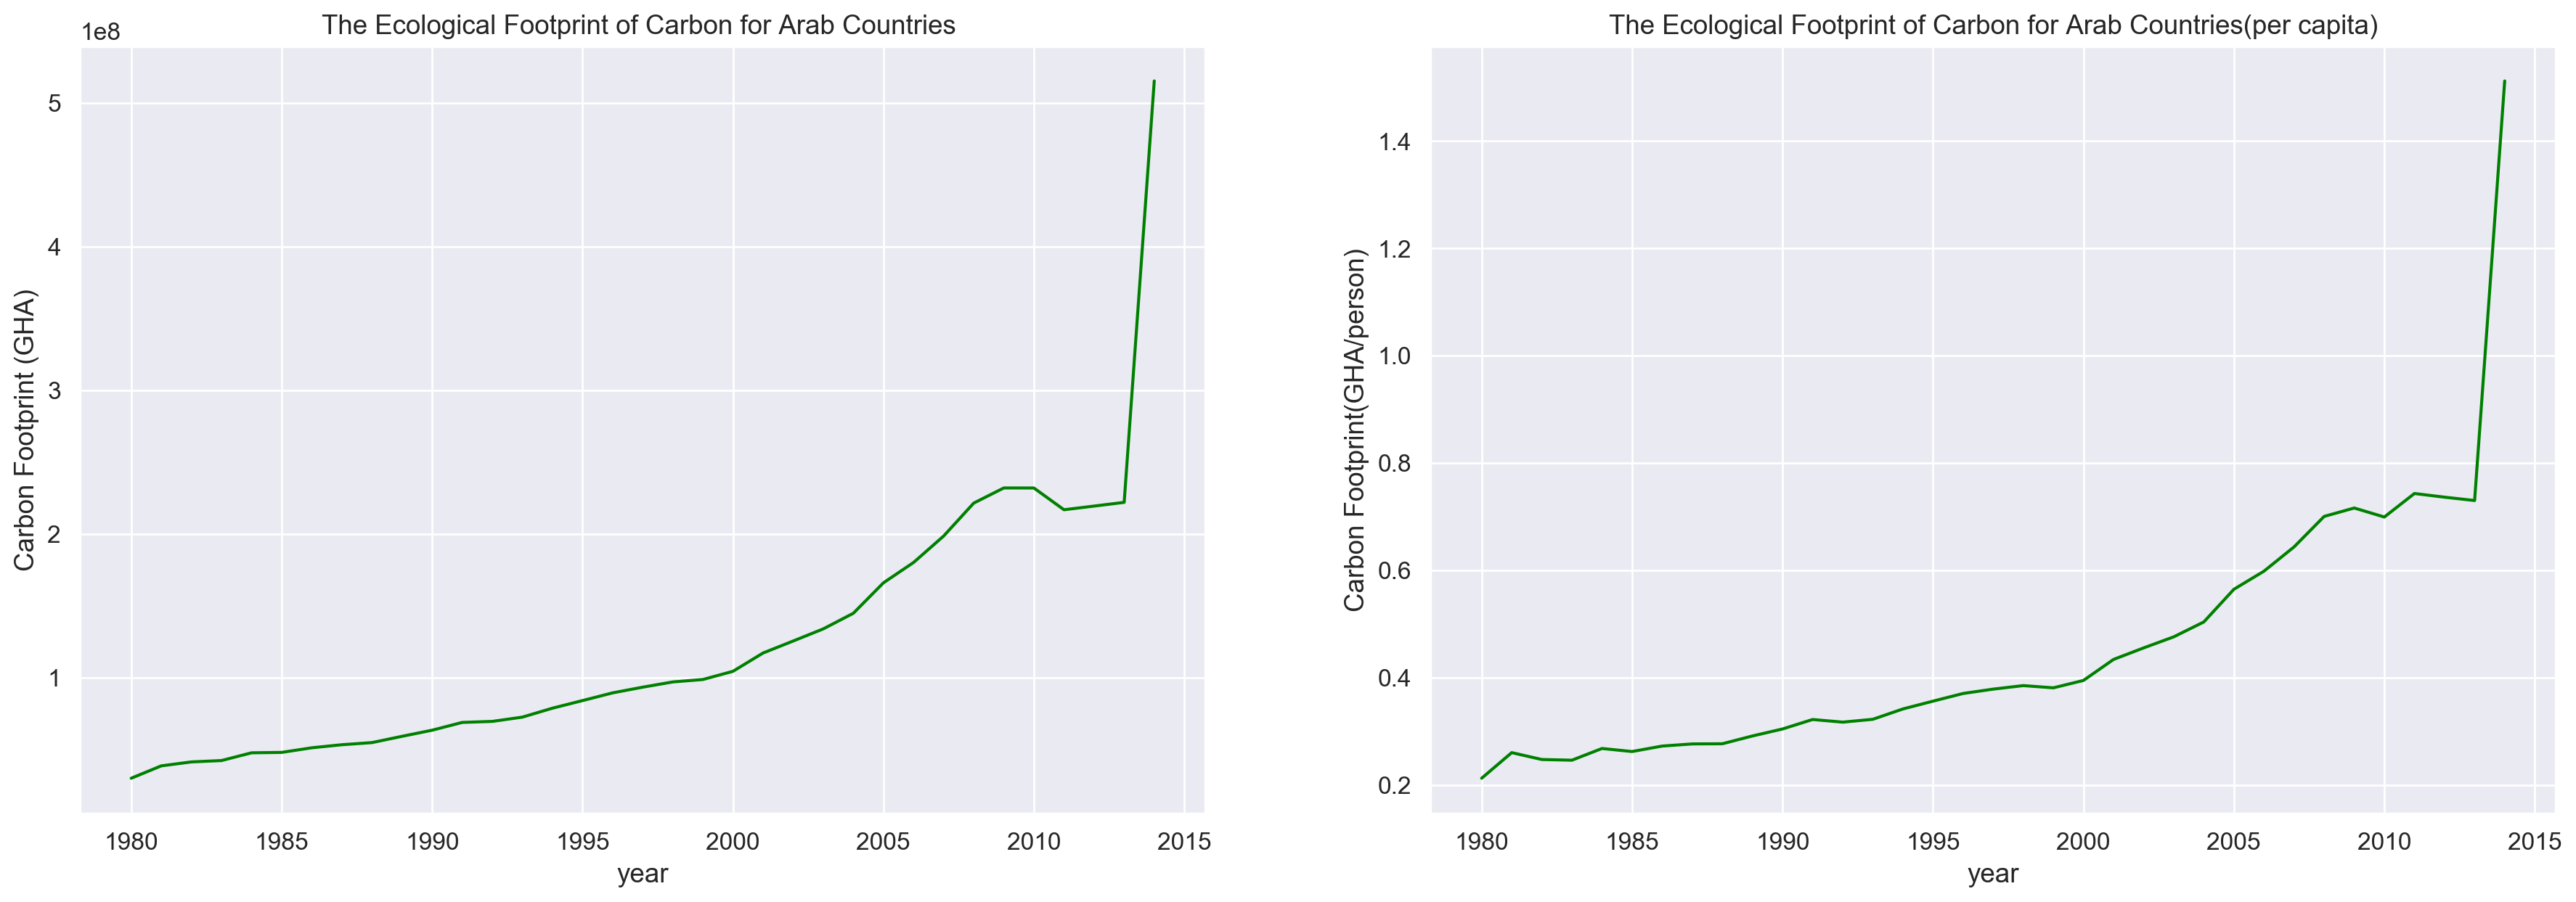

In [37]:
fig = plt.figure(figsize=(22,7))
fig.dpi=200
plt.subplot2grid((1,2),(0,0))
sns.lineplot(years[19:], Arab_EFConsCarbonTot[19:],color='green')
plt.xlabel("year")
plt.ylabel("Carbon Footprint (GHA)")
plt.title("The Ecological Footprint of Carbon for Arab Countries ")
plt.subplot2grid((1,2),(0,1))
sns.lineplot(years[19:], Arab_EFConsCarbonPerCap[19:],color='green')
plt.xlabel("year")
plt.ylabel("Carbon Footprint(GHA/person)")
plt.title("The Ecological Footprint of Carbon for Arab Countries(per capita)")

# Crop Land Footprint
The crop land footprint measures the required crop land to meet the consumbtion needs. 

**Arab Countries by Crop Land Footprint**

excluded countries from dataset in 2014 are : 
Egypt
Sudan (former)
Comoros


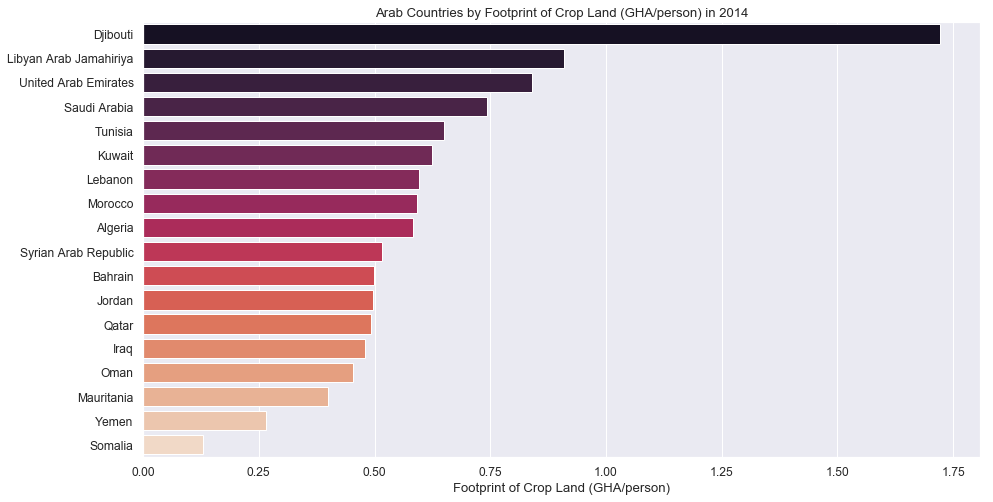

In [38]:
fig = plt.figure(figsize=(15,8))
Arab_crop_land,available_countries,excluded_countries=extract_countries_feature_by_year(arab_df,arab_countries,'crop_land',2014,record="EFConsPerCap")
crob_land_df = pd.DataFrame({'country':available_countries,'crop_land':Arab_crop_land}).sort_values(by='crop_land',ascending=False)
ax=sns.barplot(crob_land_df['crop_land'],crob_land_df['country'],palette="rocket")
plt.xlabel("Footprint of Crop Land (GHA/person)")
plt.ylabel("")
plt.title("Arab Countries by Footprint of Crop Land (GHA/person) in 2014")
print_excluded_countries(excluded_countries,2014)

**Ecological Footprint of Crop Land**

In [39]:
Arab_EFConsCropLandPerCap=[]
Arab_EFConsCropLandTot =[]
for i in range (len(years)):
    sum_EFConsCropLandTot_value = np.array(extract_countries_feature_by_year(arab_df,arab_countries,'crop_land',years[i],record='EFConsTotGHA')[0]).sum()
    Arab_EFConsCropLandTot.append(sum_EFConsCropLandTot_value)
    Arab_EFConsCropLandPerCap.append(sum_EFConsCropLandTot_value/arab_countrs_population[i])

The excluded countries from 1980 to 2010 are [Egypt , Algeria, Iraq, Mauritania, Morocco, Saudi Arabia, Comoros, Djibouti]

Text(0.5,1,'The Ecological Footprint of Crop Land for Arab Countries(per capita)')

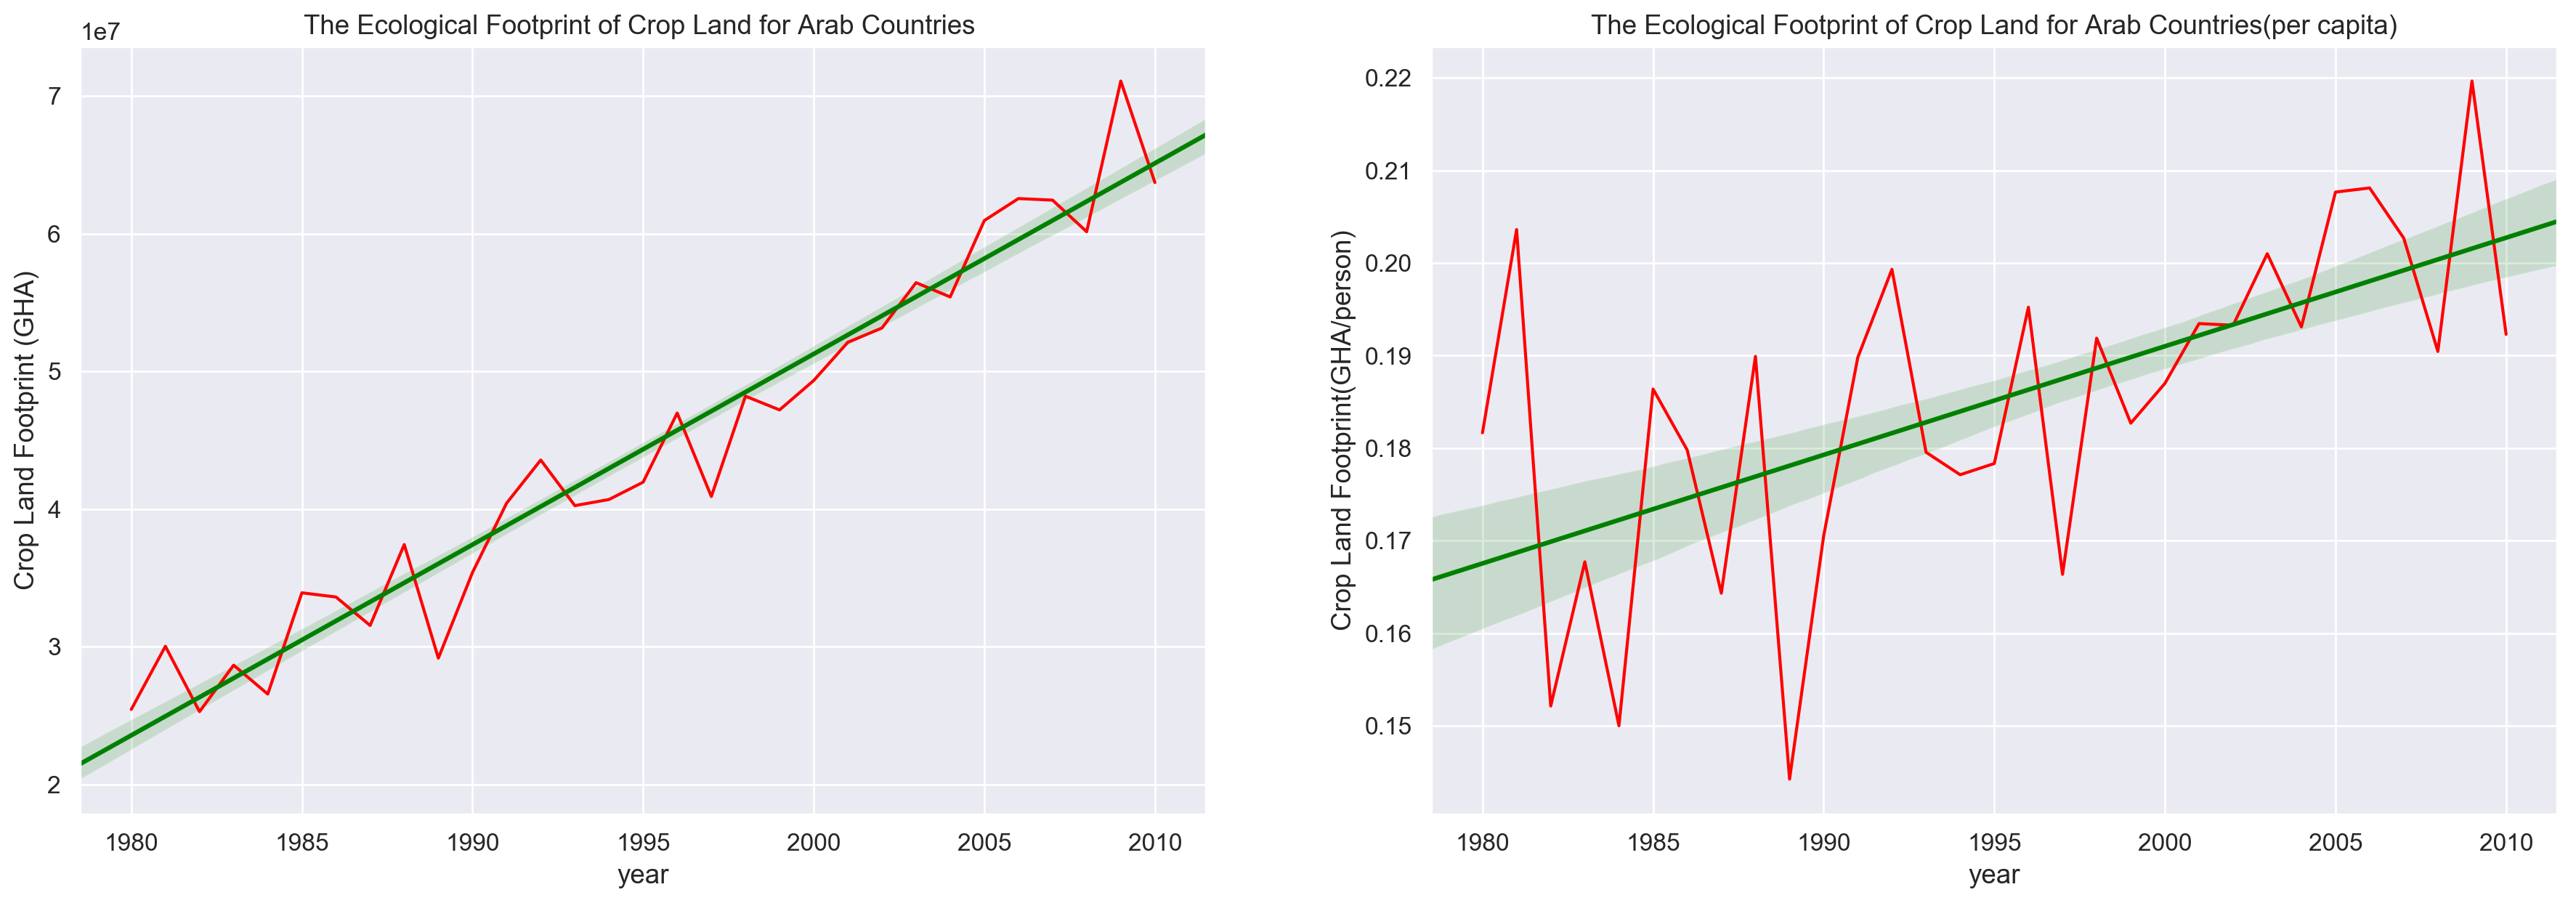

In [40]:
fig = plt.figure(figsize=(22,7))
fig.dpi=200
plt.subplot2grid((1,2),(0,0))
sns.lineplot(years[19:50], Arab_EFConsCropLandTot[19:50],color='red')       # years[19:50] the years from 1980 to 2010
sns.regplot(years[19:50], Arab_EFConsCropLandTot[19:50],color='green',ci=68,scatter_kws={"s": 0})
plt.xlabel("year")
plt.ylabel("Crop Land Footprint (GHA)")
plt.title("The Ecological Footprint of Crop Land for Arab Countries ")
plt.subplot2grid((1,2),(0,1))
sns.lineplot(years[19:50], Arab_EFConsCropLandPerCap[19:50],color='red')
sns.regplot(years[19:50], Arab_EFConsCropLandPerCap[19:50],color='green',ci=68,scatter_kws={"s": 0})
plt.xlabel("year")
plt.ylabel("Crop Land Footprint(GHA/person)")
plt.title("The Ecological Footprint of Crop Land for Arab Countries(per capita)")

The two plots show that the overall Crop footprint has more growth rate  than the percapita Crop Land footprint.

## Conclusion

As an arabian citizin, I tried to analyse the arab Eecological footprint to know how it reflects the political and economic situation in the arab countries and the middle east.